# Чтение данных

In [1]:
# Подгружаем нужные для работы библиотеки
import pandas as pd
from IPython.display import display, HTML

In [2]:
from scipy.stats import skew
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display, HTML


In [3]:
df_original = pd.read_csv('content/dataset_1_lesson.csv')

In [4]:
# Проверяем первые 5 (по умолчанию) строк данных
df_original.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_original


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
# установим индекс на id для последуюего удобства
df_original.set_index('Id', inplace=True)

In [89]:
# Поиск нулевых данных в столбцах
df_original.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   MSSubClass          1460 non-null   int64   
 1   MSZoning            1460 non-null   object  
 2   LotFrontage         1201 non-null   float64 
 3   LotArea             1460 non-null   int64   
 4   Street              1460 non-null   object  
 5   Alley               91 non-null     object  
 6   LotShape            1460 non-null   object  
 7   LandContour         1460 non-null   object  
 8   Utilities           1460 non-null   object  
 9   LotConfig           1460 non-null   object  
 10  LandSlope           1460 non-null   object  
 11  Neighborhood        1460 non-null   object  
 12  Condition1          1460 non-null   object  
 13  Condition2          1460 non-null   object  
 14  BldgType            1460 non-null   object  
 15  HouseStyle          1460 non-null   object 

In [9]:
# а если в процентах
df_original.isna().mean()

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [10]:
missing_values = df_original.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Поиск нулевых значений
- LotFrontage - Линейные футы улицы, примыкающей к участку - дом может не примыкать к улице. Проверяем эту гипотезу ниже сравнивая с данными LotConfig
- Alley - Проезд через участок. Нулевое поле просто обозначает что проезда нет.
- MasVnrType - тип каменной кладки. Ее может не быть, поэтому нулевые значения оправданы.
- MasVnrArea - площадь каменной кладки. Если кладки нет, то и площади нет. (ниже проверяем нет ли исключений что кладка есть, а площадь нулевая)
- BsmtQual,BsmtCond, BsmtExposure, BsmtExposure, BsmtFinType1,BsmtFinType2   данные подвала. Нет подвала нет и этих данных(ниже проверяем нет ли исключений т.е отсутствует что-то одно из данных (они или есть оба или обоих нет)
- FireplaceQu - качество камина. Нет камина нет качества. ниже проеряем коректность связи камина и качества
- Electrical - электрика. Возможно дом без электричества.
- GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond - данные по граражу. Нет гаража нет данных
- PoolQC - качество бассейна. Нет бассейна нет качества (ниже проверяем соответвие бассейнов)
- Fence - наличие забора (его может и не быть)
- MiscFeature - остальные данные (может и не быть)

### *Вывод: пропущенных данные - нет (LotConfig под вопросом).*

## Проверим LotConfig

In [11]:
# смотрим что у нас етсь в LotConfig
df_original['LotConfig'].unique()


array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [12]:
# Ищем пропуски/отсуцтвие значений
df_original.groupby('LotConfig')['LotFrontage'].apply(lambda x: x.isnull().sum())


LotConfig
Corner      62
CulDSac     49
FR2         14
FR3          0
Inside     134
Name: LotFrontage, dtype: int64

- Corner: 62 . Это угловые участки. Отсуствие границы с улицей вполне может быть.
- CulDSac: 49 Это тупики, поэтому аналогично.
- FR2: 14 Примыкание с 2 сторон. Тут не знаю.... спорно, но навреное допустимо.
- FR3: 0
- Inside: 134 Внутренние участки. Скорее всего тут как раз пропуски - пропущенные данные. 

### *Вывод: есть спорные внутренние участки (Inside: 134 Внутренние участки) Стоит рассмотреть необходимость заполнение их данными (например медианными)*

In [13]:
# Заполнение медианными данными (пока закоменчено)

# df_original['LotFrontage'] = df_original.groupby('LotConfig')['LotFrontage'].transform(
#     lambda x: x.fillna(x.median())
# )

## Проверка связей в данных 
(например при отсутсвии бассейна наличие данных по его качеству- ошибка и т.д.)

In [14]:

# проверяем есть ли исключения по бассейну)
mismatch = df_original[(df_original['PoolArea'] == 0) & (df_original['PoolQC'].notnull())]

if not mismatch.empty:
    display(HTML("<b style='color:red;'>Связь между 'PoolArea' и 'PoolQC' не корректна.</b>"))
    display(mismatch)

else:
    display(HTML("<b style='color:green;'>Связь между 'PoolArea' и 'PoolQC' корректна.</b>"))

In [15]:

# проверяем есть ли исключения по гаражу)
mismatch = df_original[(df_original['GarageType'] == 0) & (df_original['GarageYrBlt'].notnull()) & (df_original['GarageFinish'].notnull()) & (df_original['GarageCars'].notnull()) & (df_original['GarageArea'].notnull()) & (df_original['GarageQual'].notnull()) & (df_original['GarageCond'].notnull())]

if not mismatch.empty:
    display(HTML("<b style='color:red;'>Связь между 'GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond' не корректна.</b>"))
    display(mismatch)

else:
    display(HTML("<b style='color:green;'>Связь между 'GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond' корректна.</b>"))

In [16]:

# проверяем есть ли исключения по каминам)
mismatch = df_original[(df_original['Fireplaces'] == 0) & (df_original['FireplaceQu'].notnull())]

if not mismatch.empty:
    display(HTML("<b style='color:red;'>Связь между 'Fireplaces' и 'FireplaceQu' не корректна.</b>"))
    display(mismatch)

else:
    display(HTML("<b style='color:green;'>Связь между 'Fireplaces' и 'FireplaceQu' корректна.</b>"))


In [17]:

# проверяем есть ли исключения по подвалу)
mismatch = df_original[(df_original['BsmtQual'] == 0) & (df_original['BsmtCond'].notnull()) & (df_original['BsmtExposure'].notnull()) & (df_original['BsmtFinType1'].notnull()) & (df_original['BsmtFinType2'].notnull())]

if not mismatch.empty:
    display(HTML("<b style='color:red;'>Связь между 'BsmtQual' и 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2' не корректна</b>"))
    display(mismatch)

else:
    display(HTML("<b style='color:green;'>ССвязь между 'BsmtQual' и 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2' корректна.</b>"))    


In [18]:

# проверяем есть ли исключения по каменной кладке)
mismatch = df_original[(df_original['MasVnrArea'] == 0) & (df_original['MasVnrType'].notnull())]

if not mismatch.empty:
    display(HTML("<b style='color:red;'>Связь между 'MasVnrArea' и 'MasVnrType',  не корректна.</b>"))
    display(mismatch)

else:
    display(HTML("<b style='color:green;'>Связь между 'MasVnrArea' и 'MasVnrType' - корректна.</b>")) 
 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
689,20,RL,60.0,8089,Pave,NaN,Reg,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,392000
1242,20,RL,83.0,9849,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2007,New,Partial,248328


In [19]:
# Прроверяем где именно не совпадения
df_original.loc[689, ['MasVnrArea', 'MasVnrType']]


MasVnrArea        0.0
MasVnrType    BrkFace
Name: 689, dtype: object

In [20]:
df_original.loc[1242, ['MasVnrArea', 'MasVnrType']]

MasVnrArea      0.0
MasVnrType    Stone
Name: 1242, dtype: object

### *Найдены две проблемы где есть тип облицовки, а площадь нулевая*
Мы можем:
- Изменить тип облицовки на NAN т.е веротяность? что именно тип указан ошибочно (т.е облицовки в принципе нет).
- Заполнить площадь по сдредним зачениям для таких домов/типов облицовки (т.е ошиюочно не указана площадь)
- Удалить строки
Для проверки важности факторов создадим графики
   

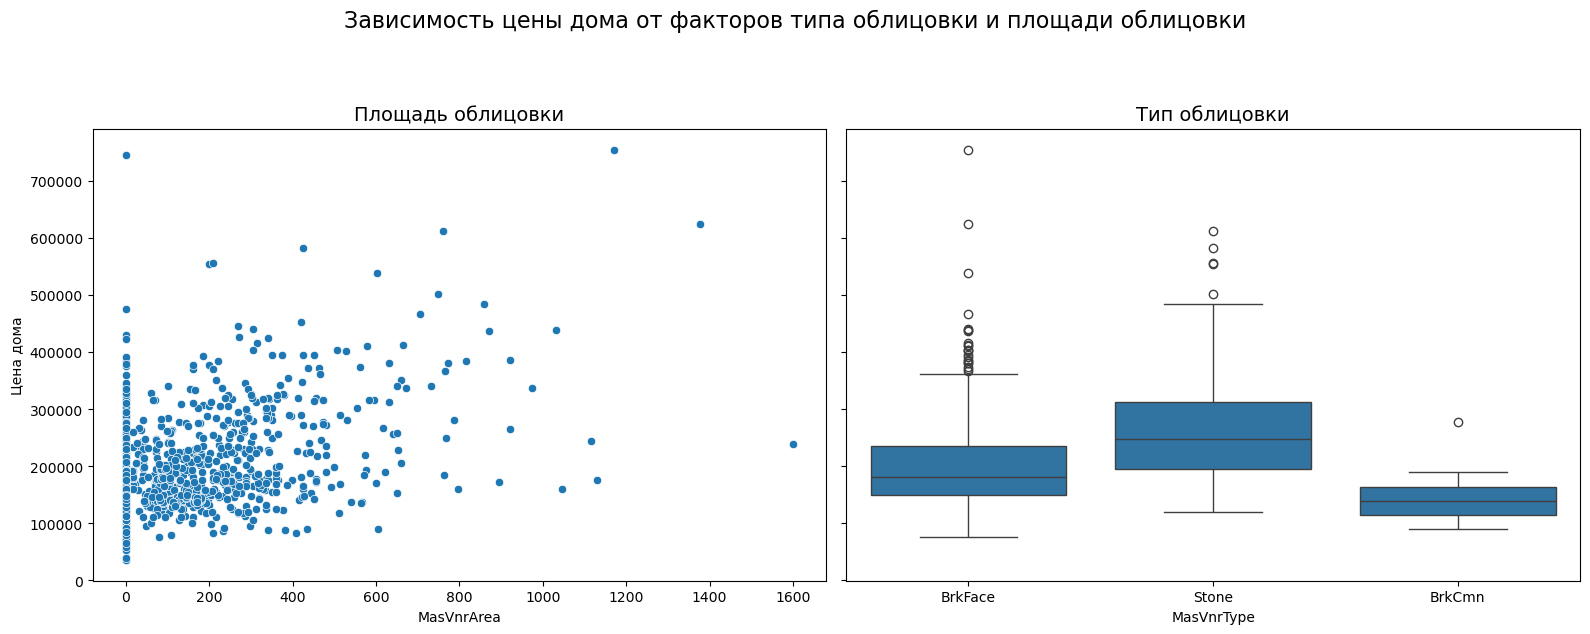

In [21]:
# Построение графиков

 
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Создаем 2 графика рядом

# Добавляем общий заголовок для всего ряда графиков
fig.suptitle(f'Зависимость цены дома от факторов типа облицовки и площади облицовки', fontsize=16, y=1.05)

# График площади облицовки
sns.scatterplot(ax=axes[0], x=df_original['MasVnrArea'], y=df_original['SalePrice'])
axes[0].set_title('Площадь облицовки', fontsize=14)
axes[0].set_xlabel('MasVnrArea')
axes[0].set_ylabel('Цена дома')

# График для типа облицовки
sns.boxplot(ax=axes[1], x=df_original['MasVnrType'], y=df_original['SalePrice'])
axes[1].set_title('Тип облицовки', fontsize=14)
axes[1].set_xlabel('MasVnrType')
axes[1].set_ylabel('Цена дома')


# Упорядочиваем и показываем графики
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Отступ для общего заголовка
plt.show()

### *Вывод: По графику можно сделать вывод о том что тип облицовки не сильно влияет на цену. Но много данных "вне усов" (на сколько их много трудно оценить по графику) надо проводить доп. исследования. По площади сказать по графику еще сложнее (так же нужны доп исследования). *
Вначале попробуем сводные таблицы

In [22]:
# сводная таблица для категорийный данных (не требует ососбых действий)
df_original.groupby('MasVnrType', dropna=False)['SalePrice'].agg(['count', 'mean'])

,count,mean
MasVnrType,,
BrkCmn,15,146318.066667
BrkFace,445,204691.871910
Stone,128,265583.625000
NaN,872,156958.243119


In [23]:
# сводная таблица для непрерывных данных ( требует предвариетльной разбивки на итервалы)
###dropna - показывает пустые значея.observed будут учитываться только те категории, которые реально присутствуют в данных, ###

df_original['MasVnrType_Group'] = pd.cut(df_original['MasVnrArea'], 5)

df_original.groupby('MasVnrType_Group', dropna=False, observed=True)['SalePrice'].agg(['count', 'mean'])

,count,mean
MasVnrType_Group,,
"(-1.6, 320.0]",1301,170587.909301
"(320.0, 640.0]",119,246941.428571
"(640.0, 960.0]",24,331601.750000
"(960.0, 1280.0]",6,351621.666667
"(1280.0, 1600.0]",2,432000.000000
NaN,8,236484.250000


*По площади данные свелись к 1 минимальному интервалу. Поэтому попробуем другую разбивку на интервалы .*

In [24]:
df_original['MasVnrType_Group_q'] = pd.qcut(df_original['MasVnrArea'], 5, duplicates='drop')  # duplicates=drop - удаляем повторные значения иначе может выбить ошибку при поытке создания

df_original.groupby('MasVnrType_Group_q', dropna=False, observed=True)['SalePrice'].agg(['count', 'mean'])

,count,mean
MasVnrType_Group_q,,
"(-0.001, 16.0]",872,156862.072248
"(16.0, 206.0]",290,188053.896552
"(206.0, 1600.0]",290,244599.017241
NaN,8,236484.250000


*Сводные таблицы так же не внесли ясности. На первый взгляд тип облицовки довольно сильно сказывается на цене. А по площади все также есть сомнения. Поэтому воспользуемся коррекляцией и тестом ANOVA*

In [25]:
# Для оценкци влияния площади облицовки воспользуемся оценкой корреляции. Отбираем только числовые столбцы (иначе корреляцию сделать не получится, выдает ошибку по категорийным столбцам)
numerical_df = df_original.select_dtypes(include=['float64', 'int64'])

# Создаем корреляционную матрицу для всех числовых данных
correlation_matrix = numerical_df.corr()
# Выводим корреляцию между MasVnrArea и SalePrice
print(f"Корреляция между 'MasVnrArea' и 'SalePrice': {correlation_matrix.loc['MasVnrArea', 'SalePrice']}")


Корреляция между 'MasVnrArea' и 'SalePrice': 0.47749304709571444


*Согласно табличным данным - Корреляция 0.3 — 0.7: умеренная положительная связь (что означает, что при увеличении площади каменной кладки цена дома имеет тенденцию расти, но эта зависимость не является очень сильной.)*
Для оценкци влияния типа кладки воспользуемся тестом ANOVA


In [26]:
# для оценки зависимости для категорийныйх данных можно исползовать тест ANOVA
from scipy.stats import f_oneway

# Для каждой категории в MasVnrType проводим тест ANOVA
grouped = [df_original[df_original['MasVnrType'] == category]['SalePrice'] for category in df_original['MasVnrType'].dropna().unique()]
anova_result = f_oneway(*grouped)

print("ANOVA test result for MasVnrType and SalePrice:", anova_result)

ANOVA test result for MasVnrType and SalePrice: F_onewayResult(statistic=30.746118547408447, pvalue=2.0105801004591816e-13)


F-статистика 30 - что означает очень высокая , что указывает на существенные различия между типами облицовки и ценой домов.
p-value крайне низкое, что означает, что вероятность того, что эти различия произошли случайно, очень мала. Это означает, что различия статистически значимы.
### *Вывод: ввиду того что по вычисленным данным тип облицовки статистичски важный для цены параметр то наилудшим вариантом будет  Изменить тип облицовки (для двух проблемых данных) на NAN т.е наиболее вероятно ошибочный выбор типа.*

In [27]:
# # заменим некорректыне данные

df = df_original.copy()
df.loc[df['MasVnrArea'] == 0, 'MasVnrType'] = np.nan


In [28]:
# проверяем еще раз есть ли проблемы
mismatch = df[(df['MasVnrArea'] == 0) & (df['MasVnrType'].notnull())]

if not mismatch.empty:
    display(HTML("<b style='color:red;'>Связь между 'MasVnrArea' и 'MasVnrType',  не корректна.</b>"))
    display(mismatch)

else:
    display(HTML("<b style='color:green;'>Связь между 'MasVnrArea' и 'MasVnrType' - корректна.</b>")) 
 

*Данные изменены корректно*

## Проверим данные на уникальность

In [29]:
for col in df.columns:
    unique_count = df[col].nunique()  # Получаем кол-вл уникальных значение для каждого столбца
    uniq_data = df[col].unique()  # Получаем массив уникальных значений для каждого столбца
    
    # Проверяем, все ли значения можно преобразовать в числа (чтобы отсеять поля типа id и вообще числа)
    is_numeric = pd.to_numeric(df[col], errors='coerce').notnull().all()
    
    if is_numeric:
        print(f"Столбец '{col}': уникальных значений {unique_count} - цифровые значения")
    else:
        print(f"Столбец '{col}': уникальных значений {unique_count} - {list(uniq_data[:5])}")

        

Столбец 'MSSubClass': уникальных значений 15 - цифровые значения
Столбец 'MSZoning': уникальных значений 5 - ['RL', 'RM', 'C (all)', 'FV', 'RH']
Столбец 'LotFrontage': уникальных значений 110 - [65.0, 80.0, 68.0, 60.0, 84.0]
Столбец 'LotArea': уникальных значений 1073 - цифровые значения
Столбец 'Street': уникальных значений 2 - ['Pave', 'Grvl']
Столбец 'Alley': уникальных значений 2 - [nan, 'Grvl', 'Pave']
Столбец 'LotShape': уникальных значений 4 - ['Reg', 'IR1', 'IR2', 'IR3']
Столбец 'LandContour': уникальных значений 4 - ['Lvl', 'Bnk', 'Low', 'HLS']
Столбец 'Utilities': уникальных значений 2 - ['AllPub', 'NoSeWa']
Столбец 'LotConfig': уникальных значений 5 - ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
Столбец 'LandSlope': уникальных значений 3 - ['Gtl', 'Mod', 'Sev']
Столбец 'Neighborhood': уникальных значений 25 - ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel']
Столбец 'Condition1': уникальных значений 9 - ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe']
Столбец 'Condition2':

### *Вывод:Столбцов с не уникальными данными нет.*

## Вычисляем основные статистические показатели для числовых столбцов (распределение)

In [30]:
df.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [31]:
# отдельно проверим распределение для столбца цен
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

*Данные имеют перекос т.к mean (среднее) = 180921, а 50% (медиана) = 163000. Т.е среднее больще медианы.  Поэтому можно попробовать проверить перекос* 

## Проверяем данные по цене на перекос(ассиметрию) (коэффициент ассиметрии)

In [32]:

skew(df['SalePrice'])


1.880940746034036

### *Вывод: Коэффициент ассиметрии сильно больше 1. Поэтому перекос значителен. И веротяно стоит применить логарифимеческое преобразование. Но в начале построим гистрограмму для проверки.*

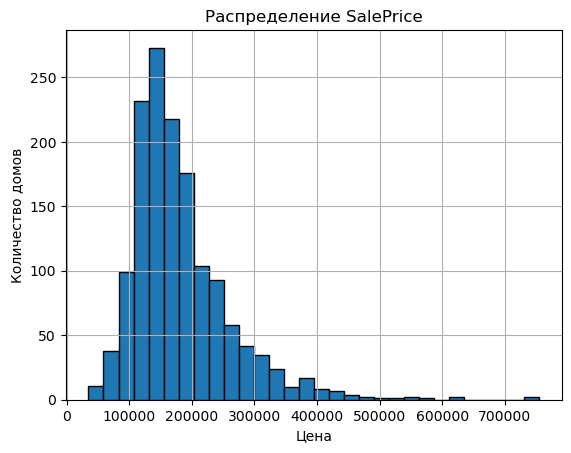

In [33]:
# построим гистограмму по сырым данным



df['SalePrice'].hist(bins=30, edgecolor='black')
plt.title('Распределение SalePrice')
plt.xlabel('Цена')
plt.ylabel('Количество домов')
plt.show() 

*Визуально перекос так же виден поэтому применяем логарифмическое преобразование  ( помогает уменьшить асимметрию) *

In [34]:
df['LogSalePrice'] = np.log(df['SalePrice'])
skew(df['LogSalePrice'])


0.1212103673013655

### *Вывод: Коэффициент ассиметрии существенно ниже 1. Чего мы и добивались*

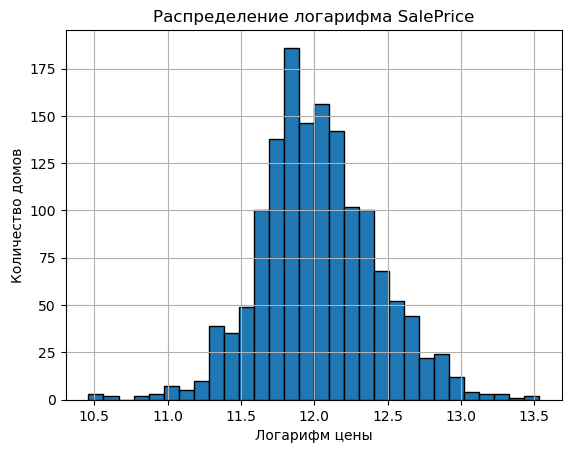

In [35]:
# построим гистограмму по преобразованны данным

df['LogSalePrice'].hist(bins=30, edgecolor='black')
plt.title('Распределение логарифма SalePrice')
plt.xlabel('Логарифм цены')
plt.ylabel('Количество домов')
plt.show() 

*Визуально на графике также наблюдаем хорошее симметричное распределение*

# Построим остальные графики зависимости по отдельным параметрам (столбцам)

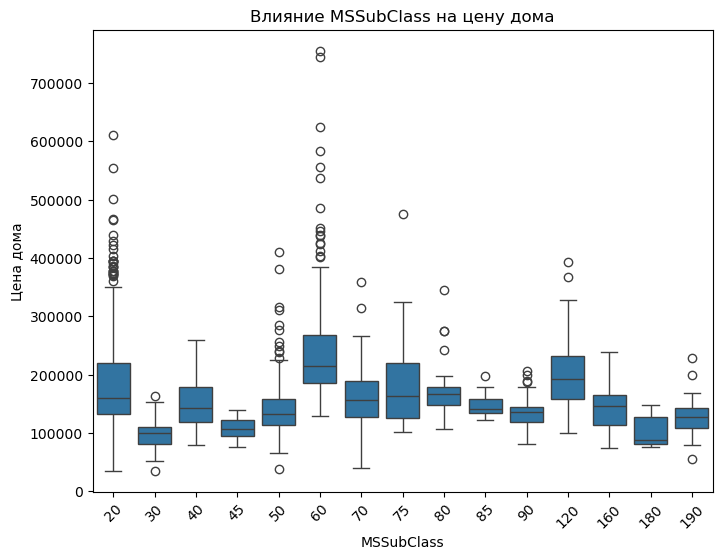

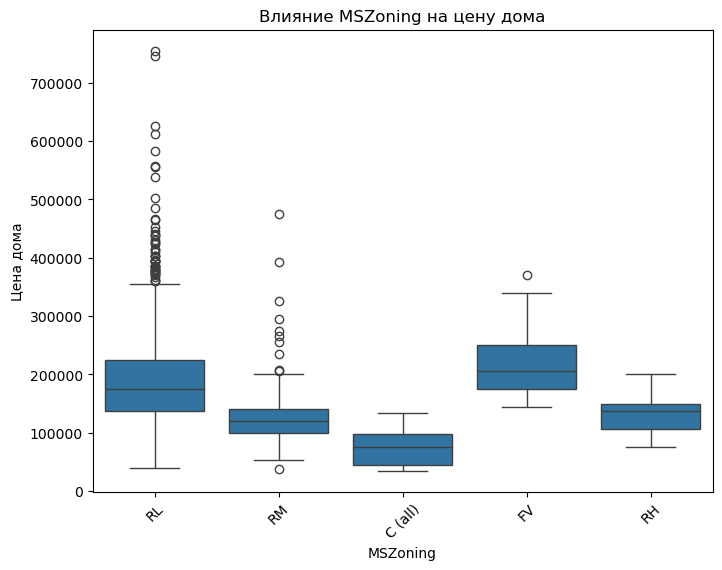

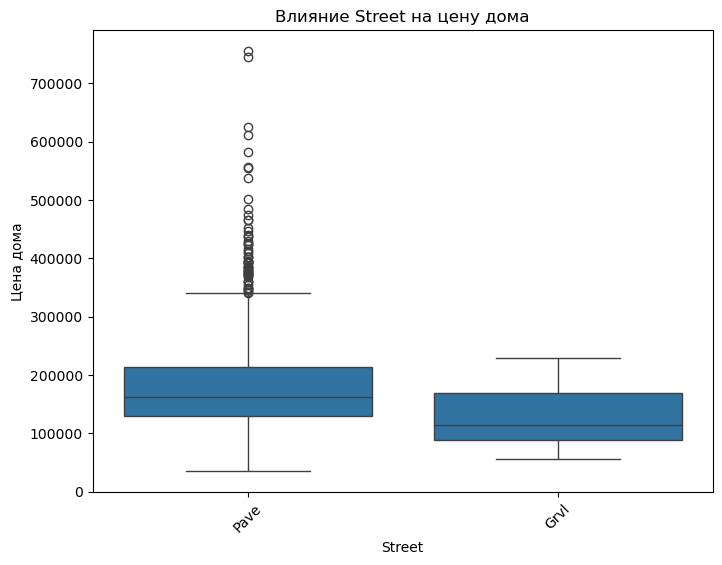

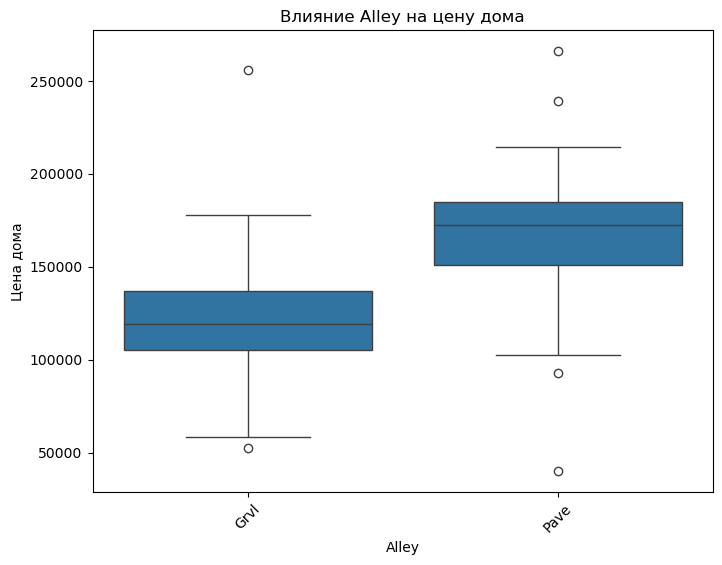

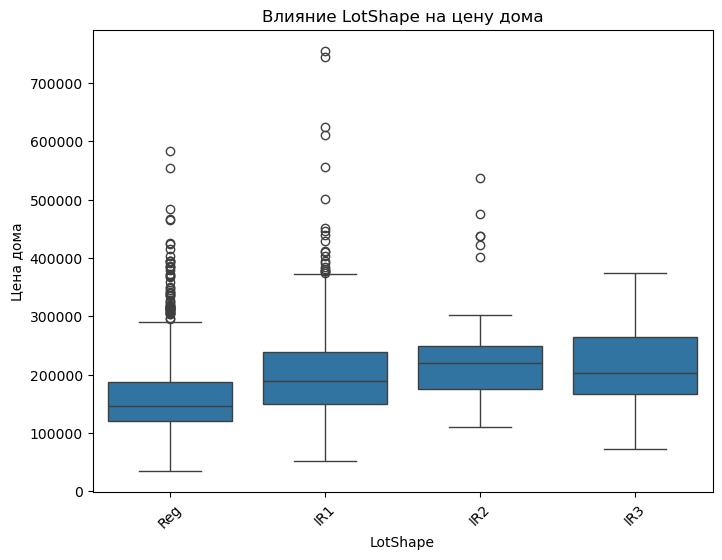

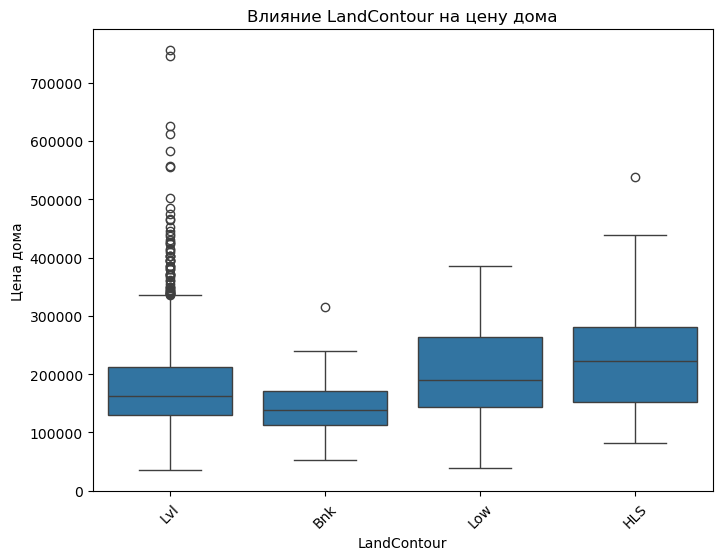

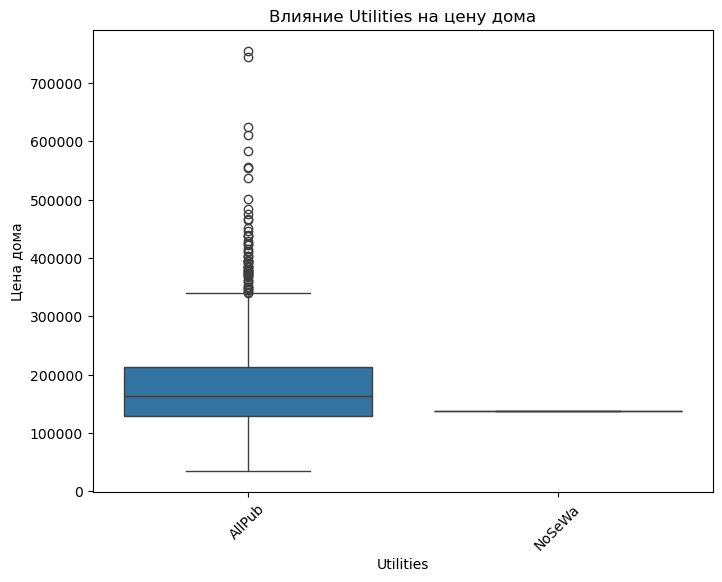

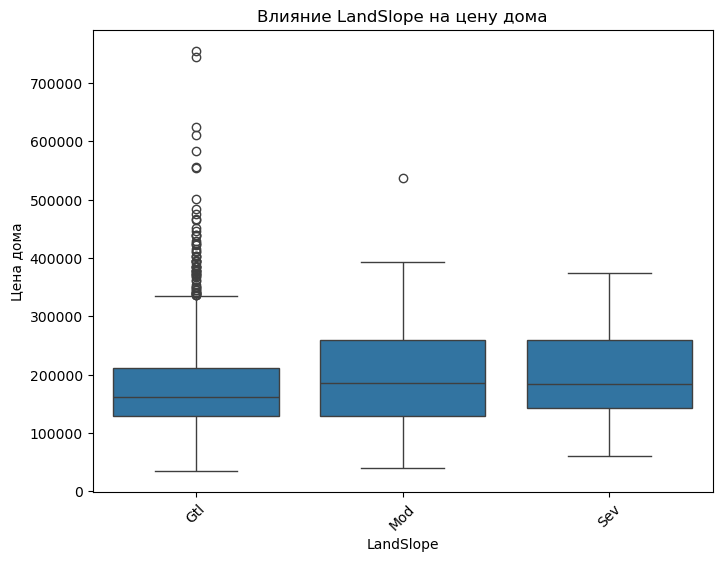

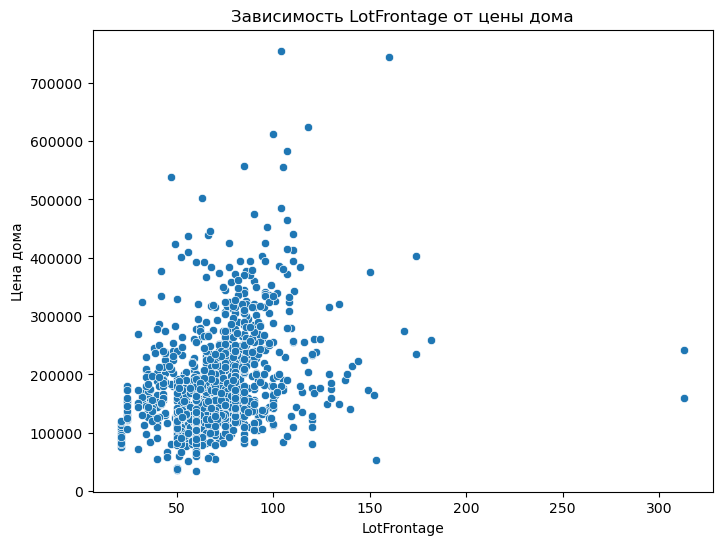

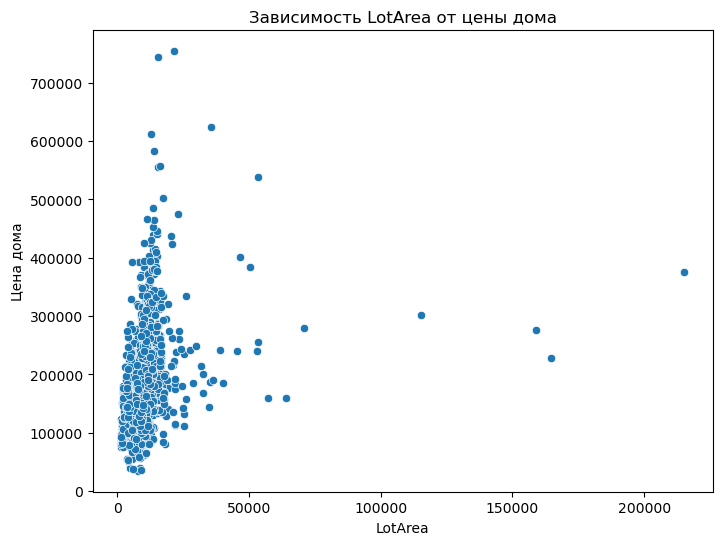

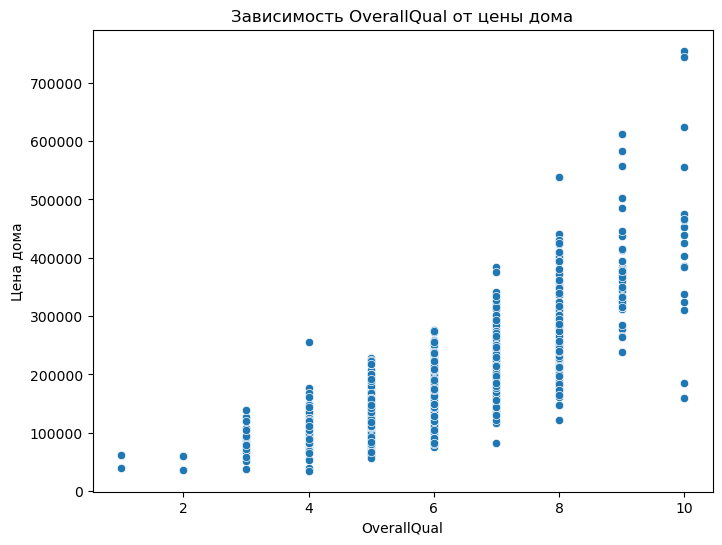

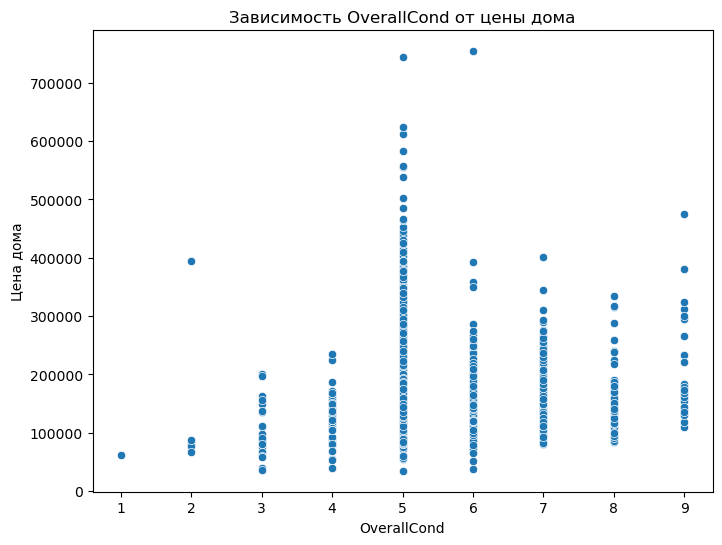

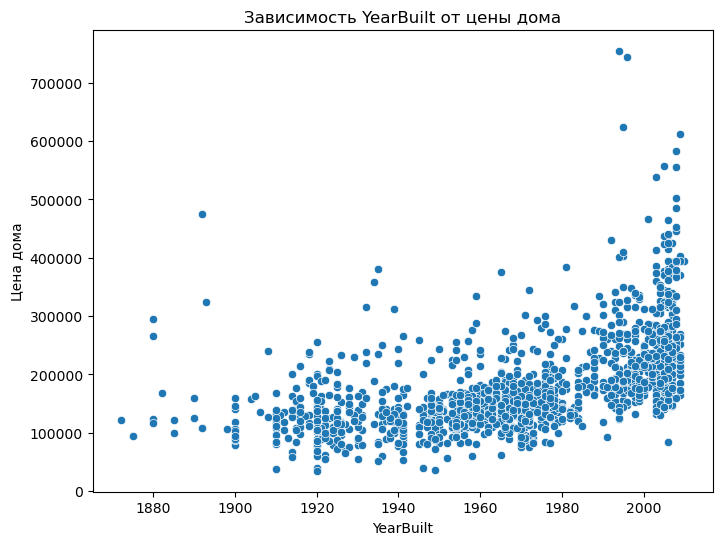

In [36]:
# Сделаем копии датафрейма для анализа разными методами
# Сохраняем копию оригинального датафрейма
original_df = df.copy()

# График для строчных(категорийных) данных
cat_columns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope']
for col in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.title(f'Влияние {col} на цену дома')
    plt.xticks(rotation=45)
    plt.ylabel('Цена дома')
    plt.show()

# График для числовых(непрерывных) данных
num_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']
for col in num_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f'Зависимость {col} от цены дома')
    plt.xlabel(col)
    plt.ylabel('Цена дома')
    plt.show()

## Попробуем избавиться от выбросов в данных
### *Вначале пройдемся по строчным/категорийным данным.*

In [37]:
# Для этого создадим функцию для отбора мусора
# Функция для обработки редких категорий

def handle_rare_categories(df, cat_columns, threshold):
    """categorical_columns - список столбцов для фильтрации, threshold - критерий фильтрации.
    (если данные в категории менее этого числа, мы их переносим в отдельно созданную категорию)"""
    for col in cat_columns:
        value = df[col].value_counts()  # считаем количество данных в каждой категории
        print(f"Количествo уникальных значений для {col}:")
        print(value)
        rare_categories = value[value < threshold].index  # выбираем редкие категории
        print(f"Редкие категории для {col}: {rare_categories}")
        df[col] = df[col].replace(rare_categories, 'Other')  # заменяем их на 'Other'
    return df


*Пробуем применить функцию к нашим столбцам*

In [38]:
df = handle_rare_categories(df, ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope'], 15)

Количествo уникальных значений для MSZoning:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Редкие категории для MSZoning: Index(['C (all)'], dtype='object', name='MSZoning')
Количествo уникальных значений для Street:
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Редкие категории для Street: Index(['Grvl'], dtype='object', name='Street')
Количествo уникальных значений для Alley:
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
Редкие категории для Alley: Index([], dtype='object', name='Alley')
Количествo уникальных значений для LotShape:
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
Редкие категории для LotShape: Index(['IR3'], dtype='object', name='LotShape')
Количествo уникальных значений для LandContour:
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Редкие категории для LandContour: Index([], dtype='object', name='LandContour'

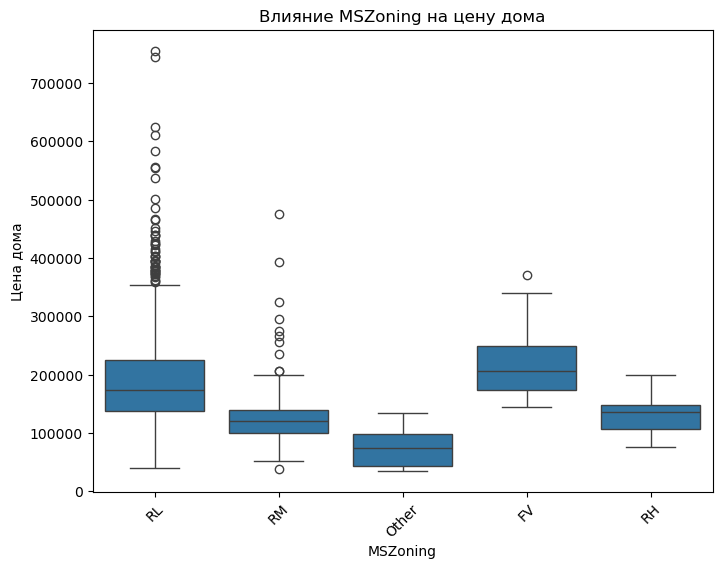

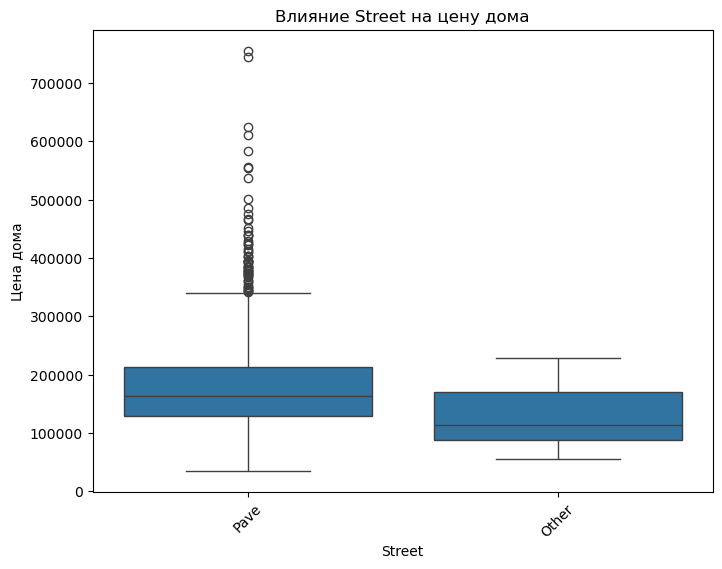

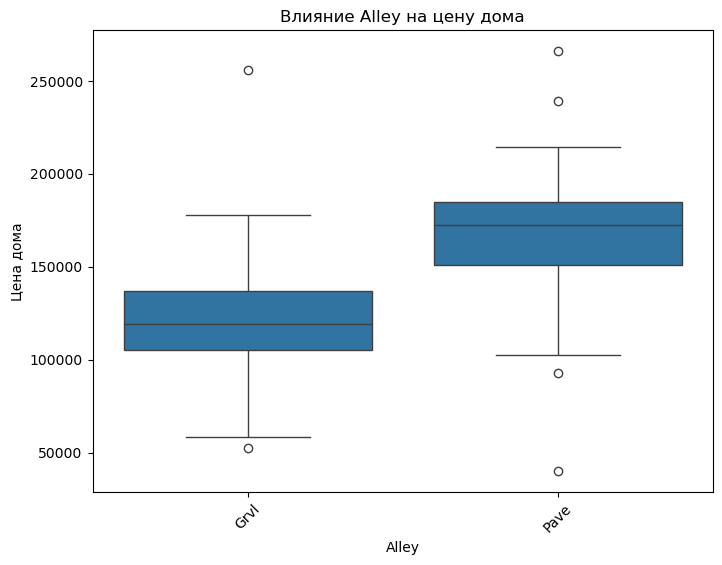

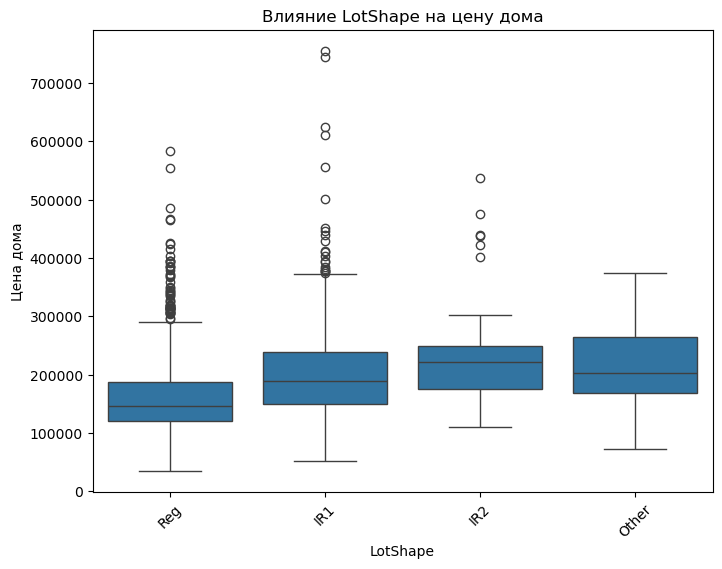

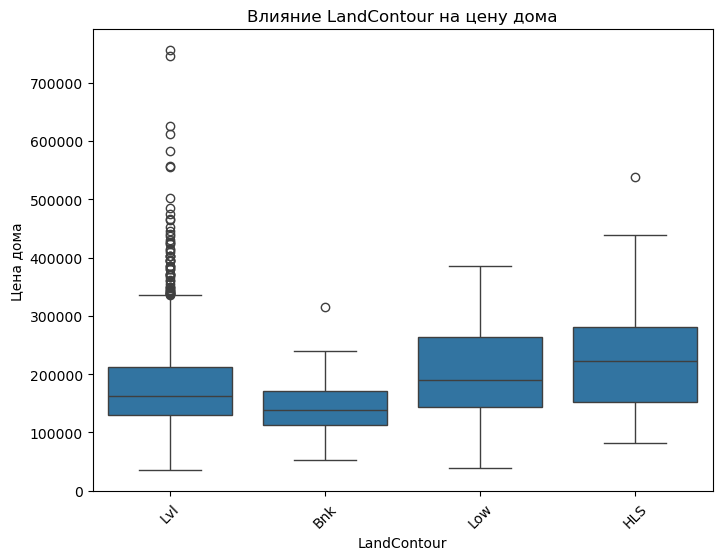

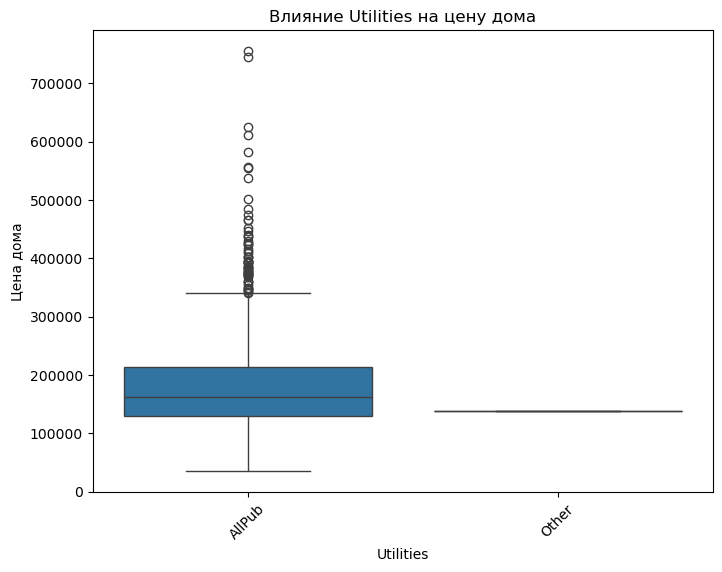

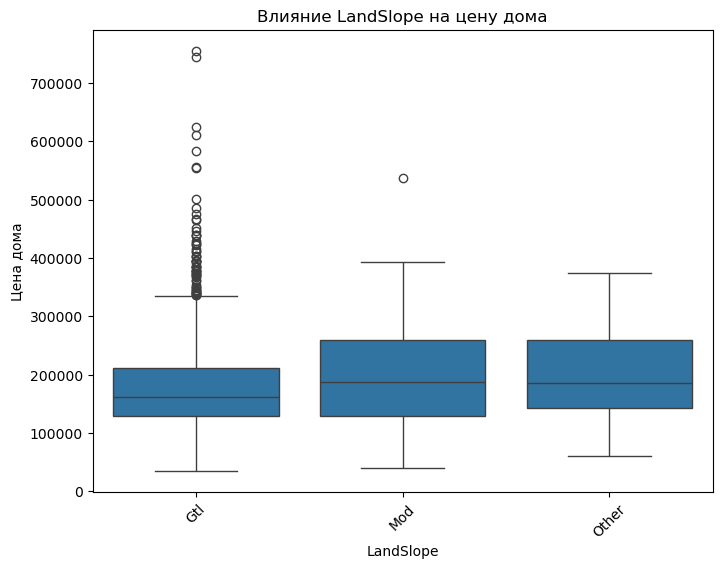

In [39]:
df['MSZoning'].unique()  # проверяем массив уникальных значений 

cat_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope']

# Построение boxplot для каждого столбца
for col in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.title(f'Влияние {col} на цену дома')
    plt.xticks(rotation=45)
    plt.ylabel('Цена дома')
    plt.show()

с

#### *Вывод: Выбросов стало меньше.Если их все еще недостаточно нужно увеличить критерий отсева нащей функции (threshold)*

### Чистим выбросы у цифровых данных


*Для этого попробуем использовать два разных метода "Метод стандартного отклонения (STD)" и "Метод IQR (межквартильный размах) для определения оптимального*

In [40]:
# Функция для удаления выбросов с использованием стандартного отклонения
def remove_outliers_STD(df, numerical_columns):
    for col in numerical_columns:
        mean = df[col].mean()  # вычисляем среднее
        std = df[col].std()  # вычисляем стандартное отклонение
        threshold_upper = mean + 3 * std  # верхняя граница
        threshold_lower = mean - 3 * std  # нижняя граница
        df = df[(df[col] >= threshold_lower) & (df[col] <= threshold_upper)]  # удаляем выбросы
    return df

In [41]:
# Функция для удаления выбросов с использованием IQR
def remove_outliers_IQR(df, numerical_columns):
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)  # первый квартиль
        Q3 = df[col].quantile(0.75)  # третий квартиль
        IQR = Q3 - Q1  # межквартильный размах
        lower_bound = Q1 - 1.5 * IQR  # нижняя граница для выбросов
        upper_bound = Q3 + 1.5 * IQR  # верхняя граница для выбросов
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # удаляем выбросы
    return df


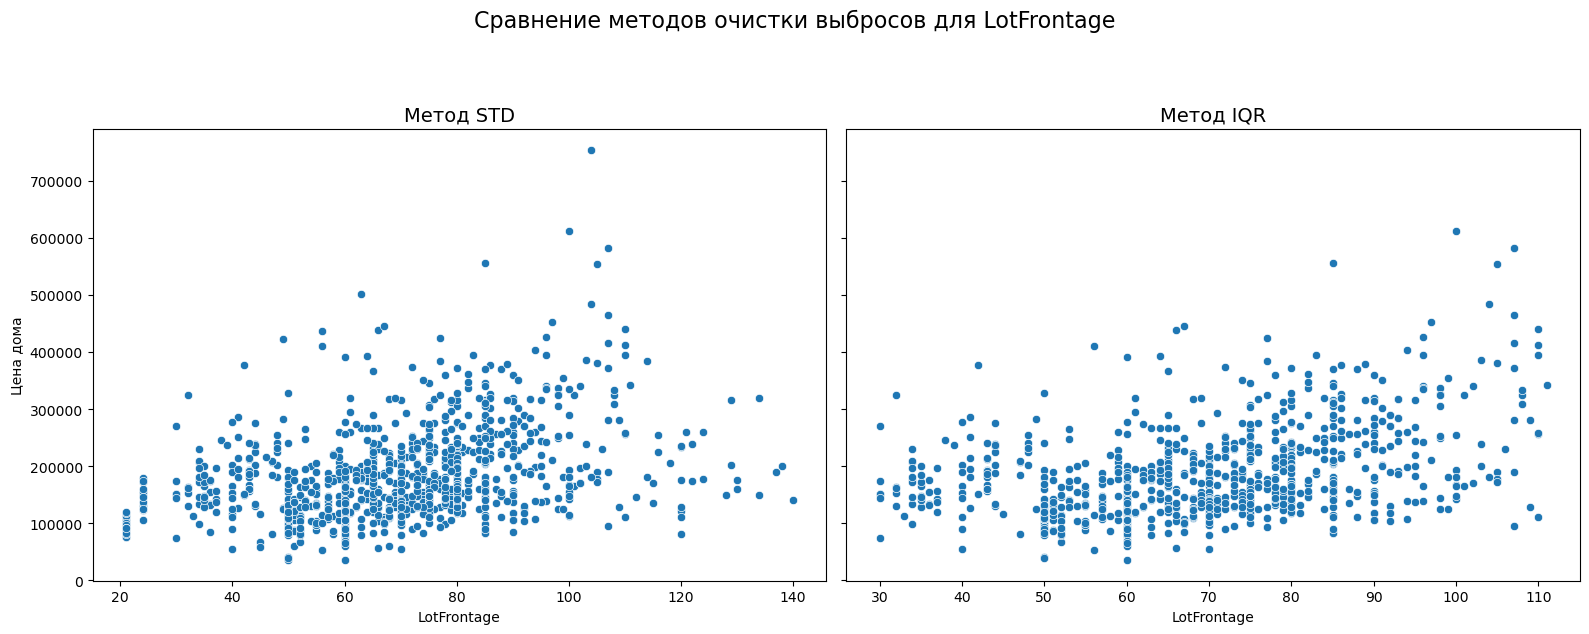

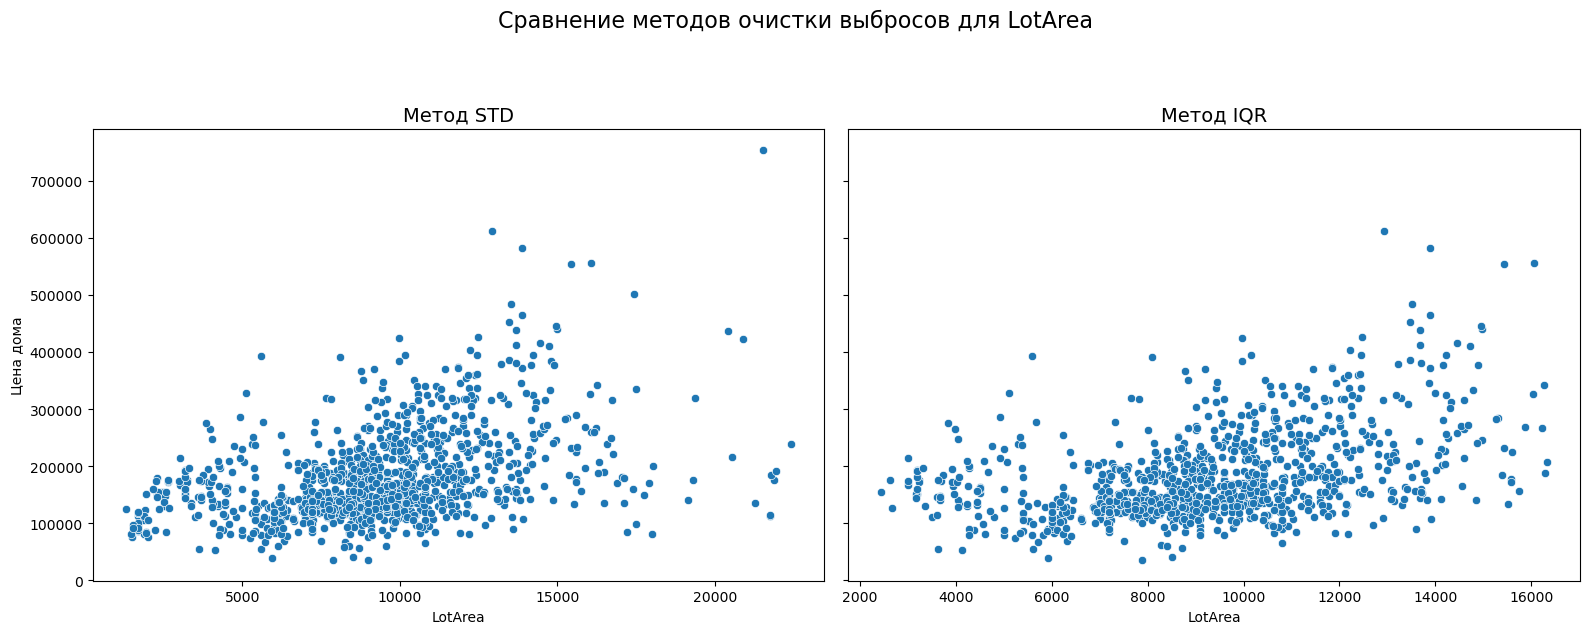

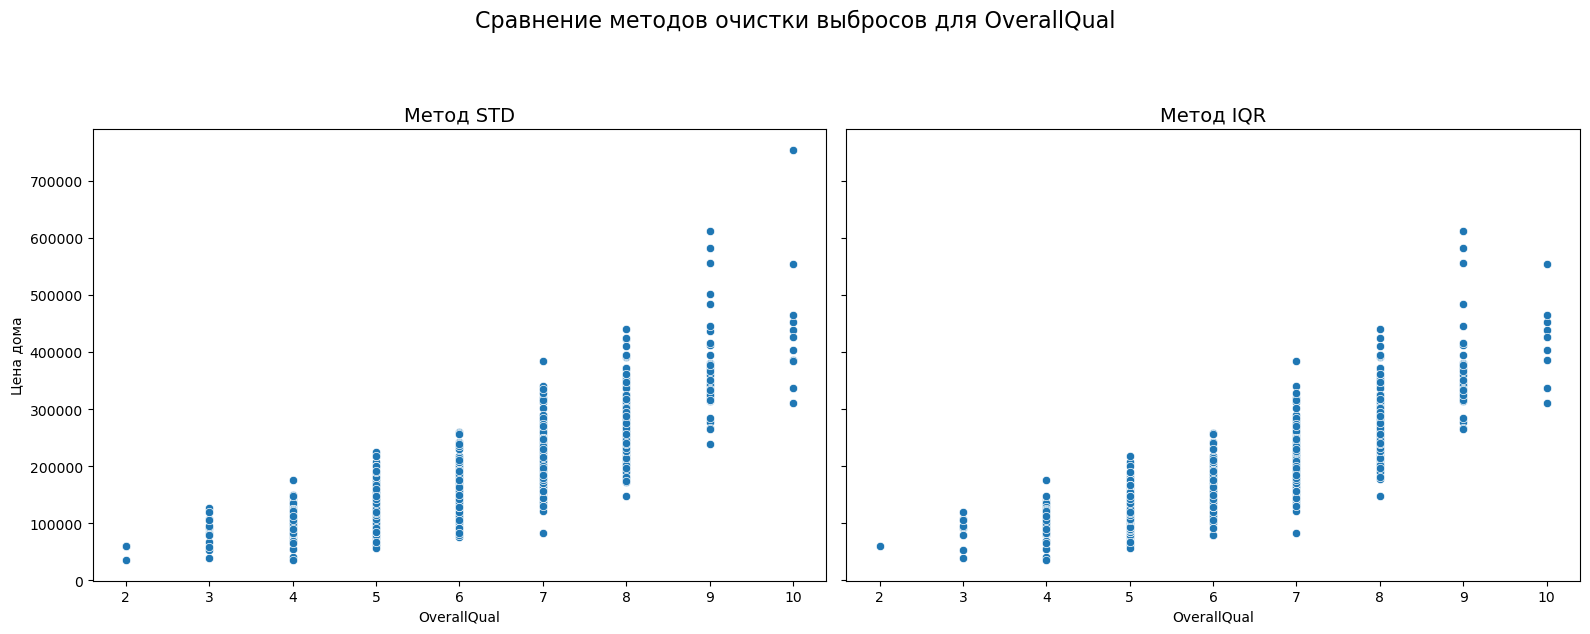

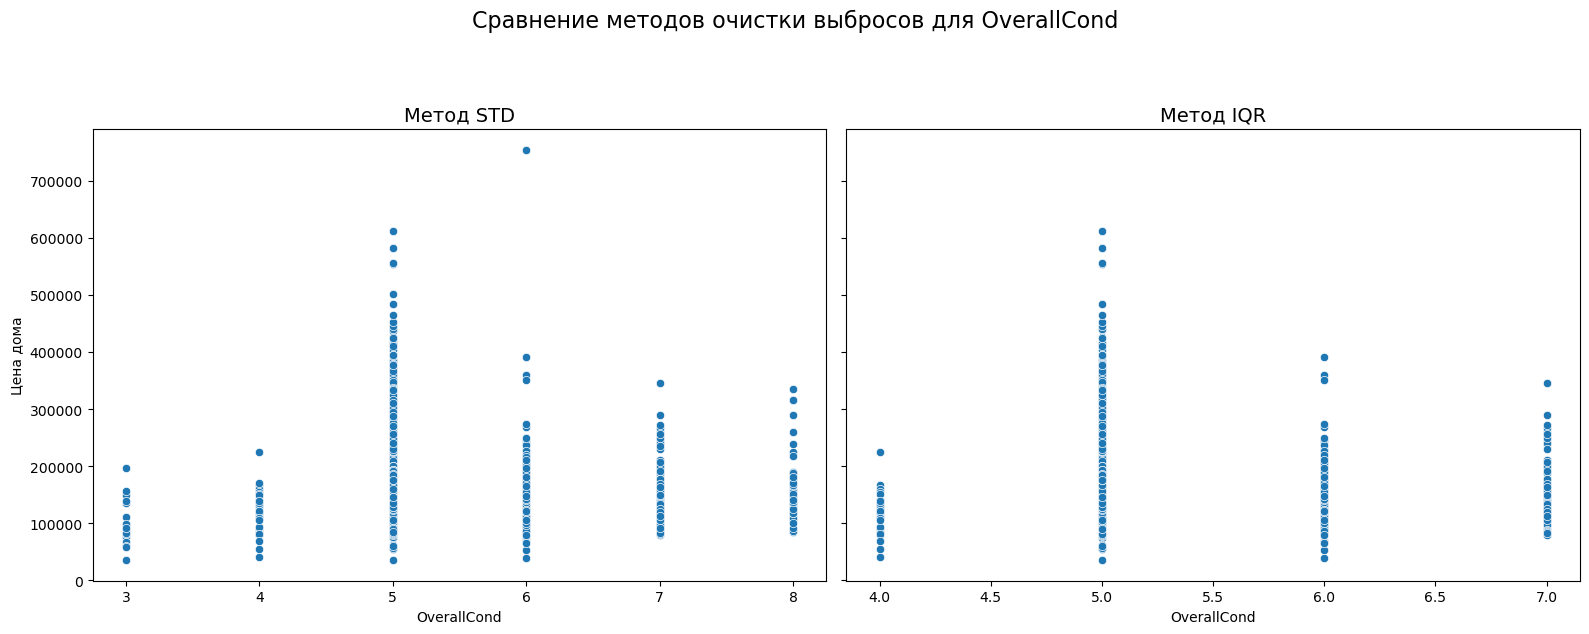

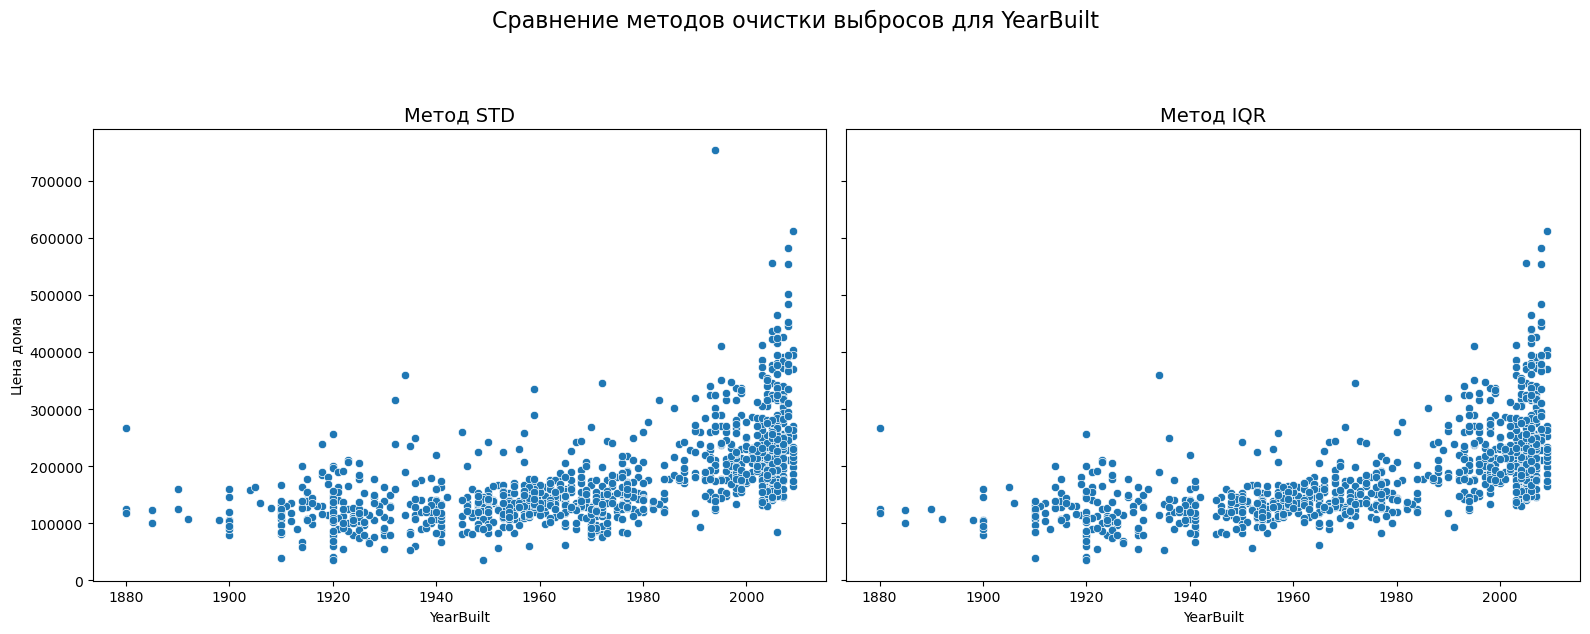

In [42]:
# Применим к числовым данным
numerical_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']

# Применение метода STD
df_std_filtered = remove_outliers_STD(original_df.copy(), numerical_columns)

# Применение метода IQR
df_iqr_filtered = remove_outliers_IQR(original_df.copy(), numerical_columns)

# Построение графиков
for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Создаем 2 графика рядом
    
    # Добавляем общий заголовок для всего ряда графиков
    fig.suptitle(f'Сравнение методов очистки выбросов для {col}', fontsize=16, y=1.05)
    
    # График для метода STD
    sns.scatterplot(ax=axes[0], x=df_std_filtered[col], y=df_std_filtered['SalePrice'])
    axes[0].set_title('Метод STD', fontsize=14)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Цена дома')

    # График для метода IQR
    sns.scatterplot(ax=axes[1], x=df_iqr_filtered[col], y=df_iqr_filtered['SalePrice'])
    axes[1].set_title('Метод IQR', fontsize=14)
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Цена дома')

    # Упорядочиваем и показываем графики
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Отступ для общего заголовка
    plt.show()

* Выбросов стало меньше, но они все еще присутсвуют на графиках*

#### * Вывод:Метод IRQ лучше справился для всех данных*

In [43]:
# делаем бэкап датафрейма и затем записываем туда уже офильстрованные данные (методов IRQ)
backup_df = original_df.copy()

df = df_iqr_filtered.copy()


# Проверим влияние данных на цену дома 
но для удобства и более глубокого анализа разделим их на 5 групп



Внешние удобства:

    LotFrontage, LotArea, Street, Alley, Fence, PoolQC, MiscFeature.

Отделка и качество:

    MasVnrType, MasVnrArea, ExterQual, ExterCond, RoofStyle, RoofMatl.

Фундамент и подвалы:

    Foundation, BsmtQual, BsmtCond, TotalBsmtSF, BsmtFinSF1, BsmtFinSF2.

Гараж:

    GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond.

Удобства внутри дома:

    KitchenQual, HeatingQC, CentralAir, Functional.

## *1. Внешние удобства (LotFrontage, LotArea, Street, Alley, Fence, PoolQC, MiscFeature)*

*Вначале нам нужно нормализовать данные. т.е приветсив се данныые к однотипным значениям*
*Для преобразования категорийных данных можно прикинуть их веса значений и перевсти данные в соответствии с этими весами*
*Вараинтов расчета весов несолько (среднее значение, корреляция с ценой, регрессия, энтропия). Мы попробуем первые два и посмтрим какой метод даст более интересные для нас веса.*
*Соответвенно со следующими группами будем использоть только выбранный метод*

In [44]:
# проверим типы данных

df[['LotFrontage', 'LotArea', 'Street', 'Alley', 'PoolQC', 'Fence', 'MiscFeature']].dtypes

LotFrontage    float64
LotArea          int64
Street          object
Alley           object
PoolQC          object
Fence           object
MiscFeature     object
dtype: object

In [45]:
# только LotFrontage и LotArea числовые поля. Поэтому мы потом их будем нормализовать. А для остальных полей попроуем получить веса двумя методами.

In [46]:


# Среднее значение


# Приведение категорий к числовым значениям

# Применение преобразований (группируем с  SalePrice затем делим значения на максимально, заполняя отсуствующие данные 0 и записываем в словарь)

# Fence
fence_prices = df.groupby('Fence')['SalePrice'].mean()
fence_mapping_avr = (fence_prices / fence_prices.max()).fillna(0).to_dict()

# PoolQC
pool_prices = df.groupby('PoolQC')['SalePrice'].mean()
pool_mapping_avr = (pool_prices / pool_prices.max()).fillna(0).to_dict()

# Street
street_prices = df.groupby('Street')['SalePrice'].mean()
street_mapping_avr = (street_prices / street_prices.max()).fillna(0).to_dict()

# Alley
alley_prices = df.groupby('Alley')['SalePrice'].mean()
alley_mapping_avr = (alley_prices / alley_prices.max()).fillna(0).to_dict()


# MiscFeature
misc_prices = df.groupby('MiscFeature')['SalePrice'].mean()
misc_mapping_avr = (misc_prices / misc_prices.max()).fillna(0).to_dict()


print("Fence Mapping (среднее):", fence_mapping_avr)
print("PoolQC Mapping (среднее):", pool_mapping_avr)
print("Street Mapping (среднее):", street_mapping_avr)
print("Alley Mapping (среднее):", alley_mapping_avr)
print("MiscFeature Mapping (среднее):", misc_mapping_avr)




Fence Mapping (среднее): {'GdPrv': 1.0, 'GdWo': 0.7578282912574738, 'MnPrv': 0.8141618885322264, 'MnWw': 0.7492555471618559}
PoolQC Mapping (среднее): {'Fa': 1.0, 'Gd': 0.9447513812154696}
Street Mapping (среднее): {'Grvl': 0.5204100087333102, 'Pave': 1.0}
Alley Mapping (среднее): {'Grvl': 0.7240308733166909, 'Pave': 1.0}
MiscFeature Mapping (среднее): {'Othr': 0.6775022069971517, 'Shed': 1.0}


In [47]:
# Корреляционный анализ

# Переводим данные в бинарные и затем проверяем корреляцию с SalePrice
fence_correlations = pd.get_dummies(df['Fence'], prefix='Fence').corrwith(df['SalePrice'])
pool_correlations = pd.get_dummies(df['PoolQC'], prefix='Pool').corrwith(df['SalePrice'])
street_correlations = pd.get_dummies(df['Street'], prefix='Street').corrwith(df['SalePrice'])
alley_correlations = pd.get_dummies(df['Alley'], prefix='Alley').corrwith(df['SalePrice'])
misc_correlations = pd.get_dummies(df['MiscFeature'], prefix='MiscFeature').corrwith(df['SalePrice'])

# Нормализуем веса
fence_mapping = {col.split('_')[1]: corr for col, corr in fence_correlations.items() if 'Fence' in col}
pool_mapping = {col.split('_')[1]: corr for col, corr in pool_correlations.items() if 'Pool' in col}
street_mapping = {col.split('_')[1]: corr for col, corr in street_correlations.items() if 'Street' in col}
alley_mapping = {col.split('_')[1]: corr for col, corr in alley_correlations.items() if 'Alley' in col}
misc_mapping = {col.split('_')[1]: corr for col, corr in misc_correlations.items() if 'MiscFeature' in col}

# Преобразуем к положительным значениям
fence_mapping_corr = {k: v if v > 0 else 0 for k, v in fence_mapping.items()}
pool_mapping_corr = {k: v if v > 0 else 0 for k, v in pool_mapping.items()}
street_mapping_corr = {k: v if v > 0 else 0 for k, v in street_mapping.items()}
alley_mapping_corr = {k: v if v > 0 else 0 for k, v in alley_mapping.items()}
misc_mapping_corr = {k: v if v > 0 else 0 for k, v in misc_mapping.items()}

print("Fence Mapping (корреляция):", fence_mapping_corr)
print("Pool Mapping(корреляция) :", pool_mapping_corr)
print("street_ Mapping(корреляция) :", street_mapping_corr)
print("Alley Mapping(корреляция) :", alley_mapping_corr)
print("MiscFeature Mapping(корреляция) :", misc_mapping_corr)


Fence Mapping (корреляция): {'GdPrv': 0, 'GdWo': 0, 'MnPrv': 0, 'MnWw': 0}
Pool Mapping(корреляция) : {'Fa': 0, 'Gd': 0}
street_ Mapping(корреляция) : {'Grvl': 0, 'Pave': 0.0623211659232336}
Alley Mapping(корреляция) : {'Grvl': 0, 'Pave': 0}
MiscFeature Mapping(корреляция) : {'Othr': 0, 'Shed': 0}


*Скорее всего корреляционные данные получаются 0 из-за их отрицательных значений (т.е эти факторы слабо но влияют даже на уменьшение цены). Проверим эту гипотезу*

In [48]:
# Уберем преобразование к положительным значениям
fence_mapping_corr = {k: v for k, v in fence_mapping.items()}
pool_mapping_corr = {k: v for k, v in pool_mapping.items()}
alley_mapping_corr = {k: v for k, v in alley_mapping.items()}
misc_mapping_corr = {k: v for k, v in misc_mapping.items()}


print("Fence Mapping (корреляция):", fence_mapping_corr)
print("Pool Mapping(корреляция) :", pool_mapping_corr)
print("Alley Mapping(корреляция) :", alley_mapping_corr)
print("MiscFeature Mapping(корреляция) :", misc_mapping_corr)


Fence Mapping (корреляция): {'GdPrv': -0.022816540642518254, 'GdWo': -0.1291571941091349, 'MnPrv': -0.18562536259983123, 'MnWw': -0.061738119098197576}
Pool Mapping(корреляция) : {'Fa': -0.00039500514391015823, 'Gd': -0.00452056677020808}
Alley Mapping(корреляция) : {'Grvl': -0.14303718521788225, 'Pave': -0.029969953568020475}
MiscFeature Mapping(корреляция) : {'Othr': -0.051344217082289596, 'Shed': -0.10080844255626412}


*Значения очнеь меленькие и  отрицательные т.е данные слабо влияют на цену и скорее отрицательно*

*Исключаем все данные кроме street_ Mapping и в дальнейшем будем проверять только корреляцией, т.к среднее в случае низкой корреляции дает только лишние данные*

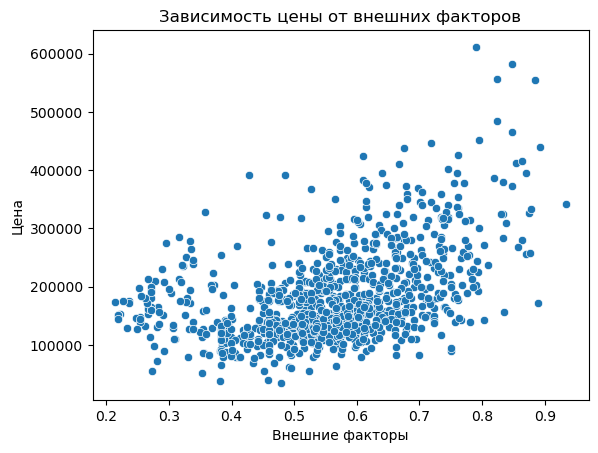

In [49]:
# Добавляем те категорийные данные что планируем использовать
df['Street_Score'] = df['Street'].map(street_mapping_corr)


# Нормализуем числовые данные
df['LotFrontage_Norm'] = df['LotFrontage'].fillna(0) / df['LotFrontage'].max()
df['LotArea_Norm'] = df['LotArea'] / df['LotArea'].max()

# Чтобы определить веса для сводных данных снова воспользуемся корреляцией

# Рассчитываем корреляцию каждого признака с ценой
correlations = df[['Street_Score', 'LotFrontage_Norm', 'LotArea_Norm', 'SalePrice']].corr()

# Извлекаем корреляцию для нужных признаков
street_corr = correlations.loc['Street_Score', 'SalePrice']
lotfrontage_corr = correlations.loc['LotFrontage_Norm', 'SalePrice']
lotarea_corr = correlations.loc['LotArea_Norm', 'SalePrice']

# Нормализуем корреляции для использования в качестве весов
total_corr = street_corr + lotfrontage_corr + lotarea_corr
street_weight = street_corr / total_corr
lotfrontage_weight = lotfrontage_corr / total_corr
lotarea_weight = lotarea_corr / total_corr

# Применяем веса для расчета Outdoor_Score
df['Outdoor_Score'] = (
    street_weight * df['Street_Score'] +
    lotfrontage_weight * df['LotFrontage_Norm'] +
    lotarea_weight * df['LotArea_Norm']
)


# Строим график

sns.scatterplot(data=df, x='Outdoor_Score', y='SalePrice')
plt.title("Зависимость цены от внешних факторов")
plt.xlabel("Внешние факторы")
plt.ylabel("Цена")
plt.show()

*Выбросов довольно много. Почистим*

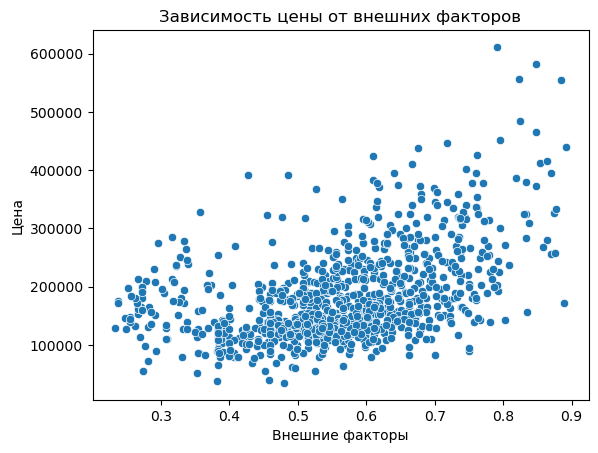

In [50]:
# Используем нашу функцию для чистки выбросов

numerical_columns = ['Outdoor_Score']

df_iqr_filtered = remove_outliers_IQR(df, numerical_columns)

# Строим график

sns.scatterplot(data=df_iqr_filtered, x=df_iqr_filtered['Outdoor_Score'], y=df_iqr_filtered['SalePrice'])
plt.title("Зависимость цены от внешних факторов")
plt.xlabel("Внешние факторы")
plt.ylabel("Цена")
plt.show()

In [51]:
print(f"Размер данных до очистки: {len(df)}")
print(f"Размер данных после очистки: {len(df_iqr_filtered)}")

Размер данных до очистки: 985
Размер данных после очистки: 978


*Проверка размеров совпадает с визуальным рядом (данные почтине изменились)*
### Вывод: Визуально почучается, что большая часть данных располагается между ценами 100000 и 400000 и при этом вытянута от 0.1 до 0.9 что приводит к мысли, что внешние факторы минимально влияют на цену! Для более детальноего обследования можно попробовать провести анализ с линенйной регрессией.

## *2. Отделка и качество (MasVnrType, MasVnrArea, ExterQual, ExterCond, RoofStyle, RoofMatl.)*

In [52]:
# проверим типы данных

df[['MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'RoofStyle', 'RoofMatl']].dtypes


MasVnrType     object
MasVnrArea    float64
ExterQual      object
ExterCond      object
RoofStyle      object
RoofMatl       object
dtype: object

In [53]:
# Исходя из полученных данных только MasVnrArea -цифровой. Т.е его мы нормализуем,  для остальных определим веса с помощью корреляции


# Переводим данные в бинарные и затем проверяем корреляцию с SalePrice
MasVnrType_correlations = pd.get_dummies(df['MasVnrType'], prefix='MasVnrType').corrwith(df['SalePrice'])
ExterQual_correlations = pd.get_dummies(df['ExterQual'], prefix='ExterQual').corrwith(df['SalePrice'])
ExterCond_correlations = pd.get_dummies(df['ExterCond'], prefix='ExterCond').corrwith(df['SalePrice'])
RoofStyle_correlations = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle').corrwith(df['SalePrice'])
RoofMatl_correlations = pd.get_dummies(df['RoofMatl'], prefix='RoofMatl').corrwith(df['SalePrice'])

# Нормализуем веса
MasVnrType_mapping = {col.split('_')[1]: corr for col, corr in MasVnrType_correlations.items() if 'MasVnrType' in col}
ExterQual_mapping = {col.split('_')[1]: corr for col, corr in ExterQual_correlations.items() if 'ExterQual' in col}
ExterCond_mapping = {col.split('_')[1]: corr for col, corr in ExterCond_correlations.items() if 'ExterCond' in col}
RoofStyle_mapping = {col.split('_')[1]: corr for col, corr in RoofStyle_correlations.items() if 'RoofStyle' in col}
RoofMatl_mapping = {col.split('_')[1]: corr for col, corr in RoofMatl_correlations.items() if 'RoofMatl' in col}

# Преобразуем к положительным значениям
MasVnrType_mapping_corr = {k: v if v > 0 else 0 for k, v in MasVnrType_mapping.items()}
ExterQual_mapping_corr = {k: v if v > 0 else 0 for k, v in ExterQual_mapping.items()}
ExterCond_mapping_corr = {k: v if v > 0 else 0 for k, v in ExterCond_mapping.items()}
RoofStyle_mapping_corr = {k: v if v > 0 else 0 for k, v in RoofStyle_mapping.items()}
RoofMatl_mapping_corr = {k: v if v > 0 else 0 for k, v in RoofMatl_mapping.items()}

print("MasVnrType Mapping (корреляция):", MasVnrType_mapping_corr)
print("ExterQual Mapping(корреляция) :", ExterQual_mapping_corr)
print("ExterCond Mapping(корреляция) :", ExterCond_mapping_corr)
print("RoofStyle Mapping(корреляция) :", RoofStyle_mapping_corr)
print("RoofMatl Mapping(корреляция) :", RoofMatl_mapping_corr)

MasVnrType Mapping (корреляция): {'BrkCmn': 0, 'BrkFace': 0.21629407669742584, 'Stone': 0.41573975759752835}
ExterQual Mapping(корреляция) : {'Ex': 0.5036603600312051, 'Fa': 0, 'Gd': 0.4861457055074405, 'TA': 0}
ExterCond Mapping(корреляция) : {'Fa': 0, 'Gd': 0, 'TA': 0.1313413800255108}
RoofStyle Mapping(корреляция) : {'Flat': 0.003964555616008858, 'Gable': 0, 'Gambrel': 0, 'Hip': 0.24916582421932806, 'Mansard': 0}
RoofMatl Mapping(корреляция) : {'CompShg': 0, 'Roll': 0, 'Tar&Grv': 0, 'WdShake': 0.01987196669417223, 'WdShngl': 0.024104075975970158}


*Данные не нулевые поэтому будем их использовать, т.е данные имеют довольно ощутимую корреляцию*

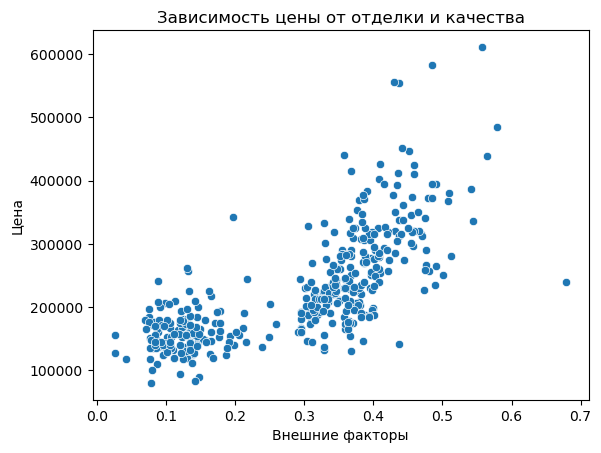

In [54]:
# Добавляем те категорийные данные что планируем использовать
df['MasVnrType_Score'] = df['MasVnrType'].map(MasVnrType_mapping_corr)
df['ExterQual_Score'] = df['ExterQual'].map(ExterQual_mapping_corr)
df['ExterCond_Score'] = df['ExterCond'].map(ExterCond_mapping_corr)
df['RoofStyle_Score'] = df['RoofStyle'].map(RoofStyle_mapping_corr)
df['RoofMatl_Score'] = df['RoofMatl'].map(RoofMatl_mapping_corr)


# Нормализуем числовые данные
df['MasVnrArea_Norm'] = df['MasVnrArea'].fillna(0) / df['MasVnrArea'].max()


# Чтобы определить веса для сводных данных снова воспользуемся корреляцией

# Рассчитываем корреляцию каждого признака с ценой
correlations = df[['MasVnrType_Score', 'ExterQual_Score', 'ExterCond_Score', 'RoofStyle_Score', 'RoofMatl_Score', 'MasVnrArea_Norm', 'SalePrice']].corr()

# Извлекаем корреляцию для нужных признаков
MasVnrType_corr = correlations.loc['MasVnrType_Score', 'SalePrice']
ExterQual_corr = correlations.loc['ExterQual_Score', 'SalePrice']
ExterCond_corr = correlations.loc['ExterCond_Score', 'SalePrice']
RoofStyle_corr = correlations.loc['RoofStyle_Score', 'SalePrice']
RoofMatl_corr = correlations.loc['RoofMatl_Score', 'SalePrice']
MasVnrArea_corr = correlations.loc['MasVnrArea_Norm', 'SalePrice']

# Нормализуем корреляции для использования в качестве весов
total_corr = MasVnrType_corr + ExterQual_corr + ExterCond_corr + RoofStyle_corr + RoofMatl_corr
MasVnrType_weight = MasVnrType_corr / total_corr
ExterQual_weight = ExterQual_corr / total_corr
ExterCond_weight = ExterCond_corr / total_corr
RoofStyle_weight = RoofStyle_corr / total_corr
RoofMatl_weight = RoofMatl_corr / total_corr
MasVnrArea_weight = MasVnrArea_corr / total_corr

# Применяем веса для расчета Outdoor_Score
df['Finish_quality_Score'] = (
    MasVnrType_weight * df['MasVnrType_Score'] +
    ExterQual_weight * df['ExterQual_Score'] +
    ExterCond_weight * df['ExterCond_Score'] +
    RoofStyle_weight * df['RoofStyle_Score'] +
    RoofMatl_weight * df['RoofMatl_Score'] +
    MasVnrArea_weight * df['MasVnrArea_Norm']
)


# Строим график

sns.scatterplot(data=df, x='Finish_quality_Score', y='SalePrice')
plt.title("Зависимость цены от отделки и качества")
plt.xlabel("Внешние факторы")
plt.ylabel("Цена")
plt.show()

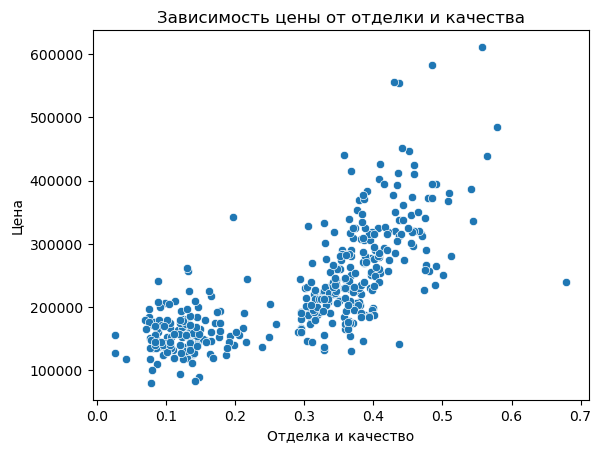

In [55]:
# Используем нашу функцию для чистки выбросов

numerical_columns = ['Finish_quality_Score']

df_iqr_filtered = remove_outliers_IQR(df, numerical_columns)

# Строим график

sns.scatterplot(data=df_iqr_filtered, x=df_iqr_filtered['Finish_quality_Score'], y=df_iqr_filtered['SalePrice'])
plt.title("Зависимость цены от отделки и качества")
plt.xlabel("Отделка и качество")
plt.ylabel("Цена")
plt.show()

In [56]:
print(f"Размер данных до очистки: {len(df)}")
print(f"Размер данных после очистки: {len(df_iqr_filtered)}")


Размер данных до очистки: 985
Размер данных после очистки: 403


### Вывод: После чистки выбросов данных стало сильно меньше, но так как графики почти не отличаются значит это всеже были выбросы а неспециализированные данные. График похож на параболический, из чего следует, что отделка и качество начининают вилят на цену только после определенного объема/качества. Т.е вначале у нас прироста почти нет,а с определенного момента довольно сильный рост.

## *3. Фундамент и подвалы:  Foundation, BsmtQual, BsmtCond, TotalBsmtSF, BsmtFinSF1, BsmtFinSF2.*

In [57]:
# проверим типы данных

df[['Foundation', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2']].dtypes


Foundation     object
BsmtQual       object
BsmtCond       object
TotalBsmtSF     int64
BsmtFinSF1      int64
BsmtFinSF2      int64
dtype: object

In [58]:
# Исходя из полученных данных TotalBsmtSF, BsmtFinSF1 и BsmtFinSF2 - цифровые Т.е их мы нормализуем,  для остальных определим веса с помощью корреляции


# Переводим данные в бинарные и затем проверяем корреляцию с SalePrice
Foundation_correlations = pd.get_dummies(df['Foundation'], prefix='Foundation').corrwith(df['SalePrice'])
BsmtQual_correlations = pd.get_dummies(df['BsmtQual'], prefix='BsmtQual').corrwith(df['SalePrice'])
BsmtCond_correlations = pd.get_dummies(df['BsmtCond'], prefix='BsmtCond').corrwith(df['SalePrice'])


# Нормализуем веса
Foundation_mapping = {col.split('_')[1]: corr for col, corr in Foundation_correlations.items() if 'Foundation' in col}
BsmtQual_mapping = {col.split('_')[1]: corr for col, corr in BsmtQual_correlations.items() if 'BsmtQual' in col}
BsmtCond_mapping = {col.split('_')[1]: corr for col, corr in BsmtCond_correlations.items() if 'BsmtCond' in col}

# Преобразуем к положительным значениям
Foundation_mapping_corr = {k: v if v > 0 else 0 for k, v in Foundation_mapping.items()}
BsmtQual_mapping_corr = {k: v if v > 0 else 0 for k, v in BsmtQual_mapping.items()}
BsmtCond_mapping_corr = {k: v if v > 0 else 0 for k, v in BsmtCond_mapping.items()}


print("Foundation Mapping (корреляция):", Foundation_mapping_corr)
print("BsmtQual Mapping(корреляция) :", BsmtQual_mapping_corr)
print("BsmtCond Mapping(корреляция) :", BsmtCond_mapping_corr)


Foundation Mapping (корреляция): {'BrkTil': 0, 'CBlock': 0, 'PConc': 0.5772801361140638, 'Slab': 0, 'Stone': 0, 'Wood': 0}
BsmtQual Mapping(корреляция) : {'Ex': 0.5952797407226192, 'Fa': 0, 'Gd': 0.2533029975538161, 'TA': 0}
BsmtCond Mapping(корреляция) : {'Fa': 0, 'Gd': 0.08996948546306394, 'TA': 0.08708774704564495}


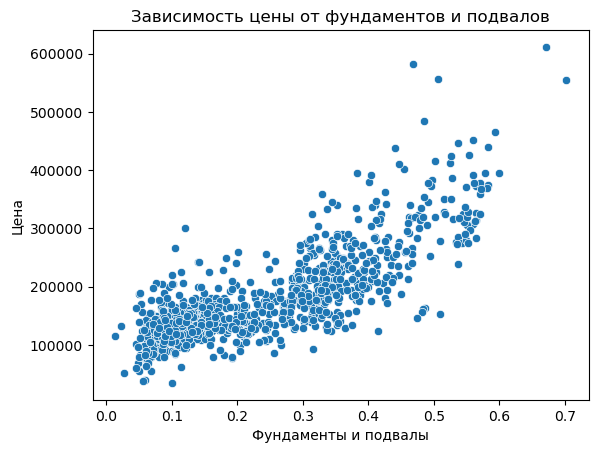

In [59]:
# Добавляем те категорийные данные что планируем использовать
df['Foundation_Score'] = df['Foundation'].map(Foundation_mapping_corr)
df['BsmtQual_Score'] = df['BsmtQual'].map(BsmtQual_mapping_corr)
df['BsmtCond_Score'] = df['BsmtCond'].map(BsmtCond_mapping_corr)


# Нормализуем числовые данные
df['TotalBsmtSF_Norm'] = df['TotalBsmtSF'].fillna(0) / df['TotalBsmtSF'].max()
df['BsmtFinSF1_Norm'] = df['BsmtFinSF1'].fillna(0) / df['BsmtFinSF1'].max()
df['BsmtFinSF2_Norm'] = df['BsmtFinSF2'].fillna(0) / df['BsmtFinSF2'].max()


# Чтобы определить веса для сводных данных снова воспользуемся корреляцией

# Рассчитываем корреляцию каждого признака с ценой
correlations = df[['Foundation_Score', 'BsmtQual_Score', 'BsmtCond_Score', 'TotalBsmtSF_Norm', 'BsmtFinSF1_Norm', 'BsmtFinSF2_Norm', 'SalePrice']].corr()

# Извлекаем корреляцию для нужных признаков
Foundation_corr = correlations.loc['Foundation_Score', 'SalePrice']
BsmtQual_corr = correlations.loc['BsmtQual_Score', 'SalePrice']
BsmtCond_corr = correlations.loc['BsmtCond_Score', 'SalePrice']
TotalBsmtSF_corr = correlations.loc['TotalBsmtSF_Norm', 'SalePrice']
BsmtFinSF1_corr = correlations.loc['BsmtFinSF1_Norm', 'SalePrice']
BsmtFinSF2_corr = correlations.loc['BsmtFinSF2_Norm', 'SalePrice']

# Нормализуем корреляции для использования в качестве весов
total_corr = Foundation_corr + BsmtQual_corr + BsmtCond_corr + TotalBsmtSF_corr + BsmtFinSF1_corr+ BsmtFinSF2_corr
Foundation_weight = Foundation_corr / total_corr
BsmtQual_weight = BsmtQual_corr / total_corr
BsmtCond_weight = BsmtCond_corr / total_corr
TotalBsmtSF_weight = TotalBsmtSF_corr / total_corr
BsmtFinSF1_weight = BsmtFinSF1_corr / total_corr
BsmtFinSF2_weight = BsmtFinSF2_corr / total_corr

# Применяем веса для расчета Outdoor_Score
df['Foundation_and_basements'] = (
    Foundation_weight * df['Foundation_Score'] +
    BsmtQual_weight * df['BsmtQual_Score'] +
    BsmtCond_weight * df['BsmtCond_Score'] +
    TotalBsmtSF_weight * df['TotalBsmtSF_Norm'] +
    BsmtFinSF1_weight * df['BsmtFinSF1_Norm'] +
    BsmtFinSF2_weight * df['BsmtFinSF2_Norm']
)


# Строим график

sns.scatterplot(data=df, x='Foundation_and_basements', y='SalePrice')
plt.title("Зависимость цены от фундаментов и подвалов")
plt.xlabel("Фундаменты и подвалы")
plt.ylabel("Цена")
plt.show()

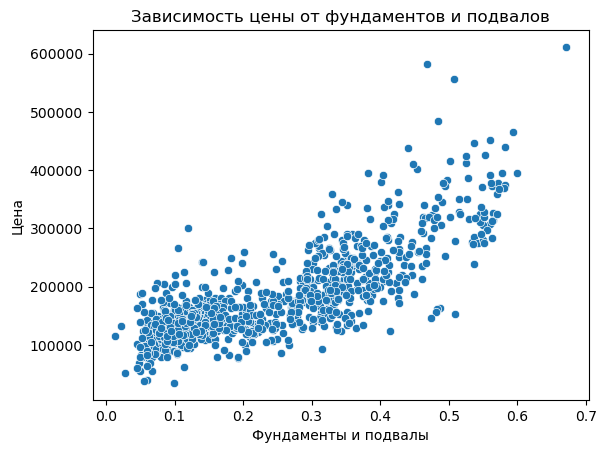

In [60]:
# Используем нашу функцию для чистки выбросов

numerical_columns = ['Foundation_and_basements']

df_iqr_filtered = remove_outliers_IQR(df, numerical_columns)

# Строим график

sns.scatterplot(data=df_iqr_filtered, x=df_iqr_filtered['Foundation_and_basements'], y=df_iqr_filtered['SalePrice'])
plt.title("Зависимость цены от фундаментов и подвалов")
plt.xlabel("Фундаменты и подвалы")
plt.ylabel("Цена")
plt.show()

In [61]:
print(f"Размер данных до очистки: {len(df)}")
print(f"Размер данных после очистки: {len(df_iqr_filtered)}")

Размер данных до очистки: 985
Размер данных после очистки: 958


*Распределние не вплоне очевидно. ПОпробуем построить их от корня данных и из логарифма (для нормализации распеределения)*

/tmp/ipykernel_9482/2895009669.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr_filtered.loc[:, 'Foundation_and_basements_sqrt'] = df_iqr_filtered.loc[:, 'Foundation_and_basements']**0.5
/tmp/ipykernel_9482/2895009669.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr_filtered.loc[:, 'Foundation_and_basements_log'] = np.log1p(df_iqr_filtered.loc[:, 'Foundation_and_basements'])


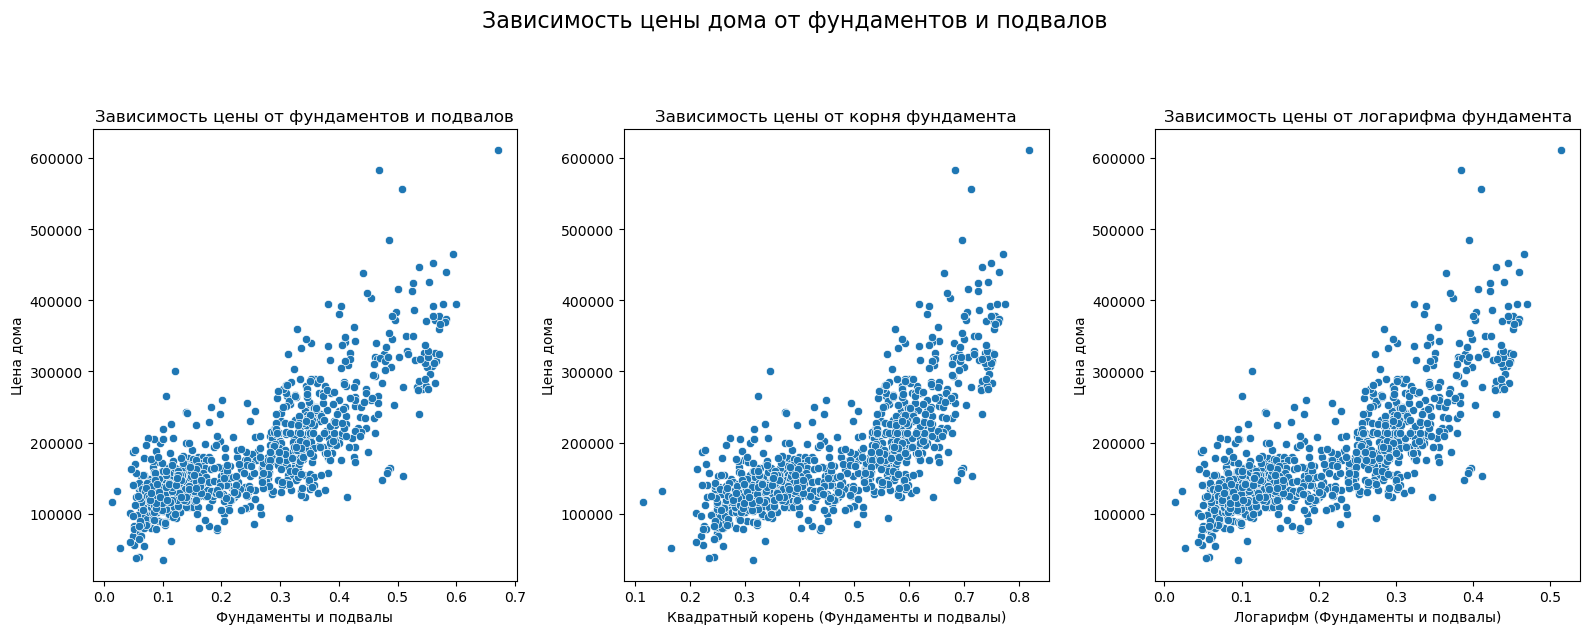

In [62]:
# Построение графиков

# Создаем 3 графика рядом
fig, axes = plt.subplots(1, 3, figsize=(16, 6))  

# Добавляем общий заголовок для всего ряда графиков
fig.suptitle(f'Зависимость цены дома от фундаментов и подвалов', fontsize=16, y=1.05)

df_iqr_filtered.loc[:, 'Foundation_and_basements_sqrt'] = df_iqr_filtered.loc[:, 'Foundation_and_basements']**0.5
df_iqr_filtered.loc[:, 'Foundation_and_basements_log'] = np.log1p(df_iqr_filtered.loc[:, 'Foundation_and_basements'])


# График базовый
sns.scatterplot(ax=axes[0], x=df_iqr_filtered['Foundation_and_basements'], y=df_iqr_filtered['SalePrice'])
axes[0].set_title("Зависимость цены от фундаментов и подвалов")
axes[0].set_xlabel("Фундаменты и подвалы")
axes[0].set_ylabel('Цена дома')

# График от корня

sns.scatterplot(ax=axes[1], x=df_iqr_filtered['Foundation_and_basements_sqrt'], y=df_iqr_filtered['SalePrice'])
axes[1].set_title("Зависимость цены от корня фундамента")
axes[1].set_xlabel("Квадратный корень (Фундаменты и подвалы)")
axes[1].set_ylabel('Цена дома')

# График от логарифма

sns.scatterplot(ax=axes[2], x=df_iqr_filtered['Foundation_and_basements_log'], y=df_iqr_filtered['SalePrice'])
axes[2].set_title("Зависимость цены от логарифма фундамента")
axes[2].set_xlabel("Логарифм (Фундаменты и подвалы)")
axes[2].set_ylabel('Цена дома')

# Упорядочиваем и показываем графики
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Отступ для общего заголовка
plt.show()



### Вывод: После чистки кол-во данных почти не изменлось. Построение графика от корня и логарифма подводит нас к тому, что график скорее параболический (ососбенно зависимость от корня), т.е функдмент и подвалы начинают оказывать влияние не сразу а после определнного объема. Но после этого они довольно сильно влияют на цену.

## *4. Гараж (GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond)*

In [63]:
# Проверим типы данных

df[['GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']].dtypes


GarageType      object
GarageFinish    object
GarageCars       int64
GarageArea       int64
GarageQual      object
GarageCond      object
dtype: object

In [64]:
# Исходя из полученных данных GarageCars, GarageArea - цифровые Т.е их мы нормализуем,  для остальных определим веса с помощью корреляции


# Переводим данные в бинарные и затем проверяем корреляцию с SalePrice
GarageType_correlations = pd.get_dummies(df['GarageType'], prefix='GarageType').corrwith(df['SalePrice'])
GarageFinish_correlations = pd.get_dummies(df['GarageFinish'], prefix='GarageFinish').corrwith(df['SalePrice'])
GarageQual_correlations = pd.get_dummies(df['GarageQual'], prefix='GarageQual').corrwith(df['SalePrice'])
GarageCond_correlations = pd.get_dummies(df['GarageCond'], prefix='GarageCond').corrwith(df['SalePrice'])


# Нормализуем веса
GarageType_mapping = {col.split('_')[1]: corr for col, corr in GarageType_correlations.items() if 'GarageType' in col}
GarageFinish_mapping = {col.split('_')[1]: corr for col, corr in GarageFinish_correlations.items() if 'GarageFinish' in col}
GarageQual_mapping = {col.split('_')[1]: corr for col, corr in GarageQual_correlations.items() if 'GarageQual' in col}
GarageCond_mapping = {col.split('_')[1]: corr for col, corr in GarageCond_correlations.items() if 'GarageCond' in col}

# Преобразуем к положительным значениям
GarageType_mapping_corr = {k: v if v > 0 else 0 for k, v in GarageType_mapping.items()}
GarageFinish_corr = {k: v if v > 0 else 0 for k, v in GarageFinish_mapping.items()}
GarageQual_mapping_corr = {k: v if v > 0 else 0 for k, v in GarageQual_mapping.items()}
GarageCond_mapping_corr = {k: v if v > 0 else 0 for k, v in GarageCond_mapping.items()}


print("GarageType Mapping (корреляция):", GarageType_mapping_corr)
print("GarageFinish Mapping(корреляция) :", GarageFinish_corr)
print("GarageQual Mapping(корреляция) :", GarageQual_mapping_corr)
print("GarageCond Mapping(корреляция) :", GarageCond_mapping_corr)

GarageType Mapping (корреляция): {'2Types': 0, 'Attchd': 0.3619433771455036, 'Basment': 0, 'BuiltIn': 0.28401569986801517, 'CarPort': 0, 'Detchd': 0}
GarageFinish Mapping(корреляция) : {'Fin': 0.44664968004940725, 'RFn': 0.19707390357389964, 'Unf': 0}
GarageQual Mapping(корреляция) : {'Ex': 0, 'Fa': 0, 'Gd': 0, 'Po': 0, 'TA': 0.277480870856513}
GarageCond Mapping(корреляция) : {'Ex': 0, 'Fa': 0, 'Gd': 0, 'Po': 0, 'TA': 0.2759229860718533}


*корреляции положительные и есть ненулевые поля, поэтому используем все данные*

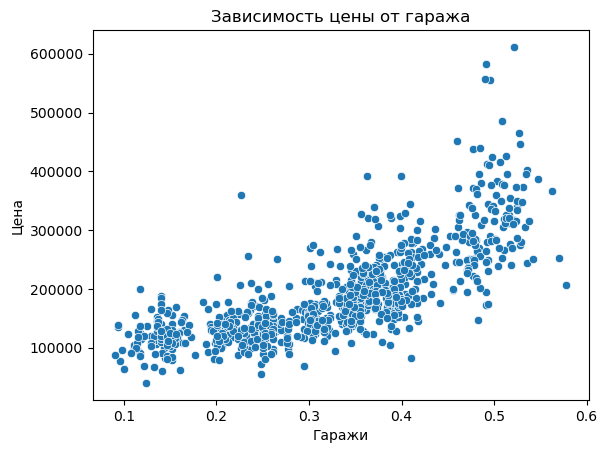

In [65]:
# Добавляем те категорийные данные что планируем использовать
df['GarageType_Score'] = df['GarageType'].map(GarageType_mapping_corr)
df['GarageFinish_Score'] = df['GarageFinish'].map(GarageFinish_corr)
df['GarageQual_Score'] = df['GarageQual'].map(GarageQual_mapping_corr)
df['GarageCond_Score'] = df['GarageCond'].map(GarageCond_mapping_corr)


# Нормализуем числовые данные
df['GarageCars_Norm'] = df['GarageCars'].fillna(0) / df['GarageCars'].max()
df['GarageArea_Norm'] = df['GarageArea'].fillna(0) / df['GarageArea'].max()



# Чтобы определить веса для сводных данных снова воспользуемся корреляцией

# Рассчитываем корреляцию каждого признака с ценой
correlations = df[['GarageType_Score', 'GarageFinish_Score', 'GarageQual_Score', 'GarageCond_Score', 'GarageCars_Norm', 'GarageArea_Norm', 'SalePrice']].corr()

# Извлекаем корреляцию для нужных признаков
GarageType_corr = correlations.loc['GarageType_Score', 'SalePrice']
GarageFinish_corr = correlations.loc['GarageFinish_Score', 'SalePrice']
GarageQual_corr = correlations.loc['GarageQual_Score', 'SalePrice']
GarageCond_corr = correlations.loc['GarageCond_Score', 'SalePrice']
GarageCars_corr = correlations.loc['GarageCars_Norm', 'SalePrice']
GarageArea_corr = correlations.loc['GarageArea_Norm', 'SalePrice']

# Нормализуем корреляции для использования в качестве весов
total_corr = GarageType_corr + GarageFinish_corr + GarageQual_corr + GarageCond_corr + GarageCars_corr + GarageArea_corr
GarageType_weight = GarageType_corr / total_corr
GarageFinish_weight = GarageFinish_corr / total_corr
GarageQual_weight = GarageQual_corr / total_corr
GarageCond_weight = GarageCond_corr / total_corr
GarageCars_weight = GarageCars_corr / total_corr
GarageArea_weight = GarageArea_corr / total_corr

# Применяем веса для расчета Outdoor_Score
df['garage'] = (
    GarageType_weight * df['GarageType_Score'] +
    GarageFinish_weight * df['GarageFinish_Score'] +
    GarageQual_weight * df['GarageQual_Score'] +
    GarageCond_weight * df['GarageCond_Score'] +
    GarageCars_weight * df['GarageCars_Norm'] +
    GarageArea_weight * df['GarageArea_Norm']
)


# Строим график

sns.scatterplot(data=df, x='garage', y='SalePrice')
plt.title("Зависимость цены от гаража")
plt.xlabel("Гаражи")
plt.ylabel("Цена")
plt.show()

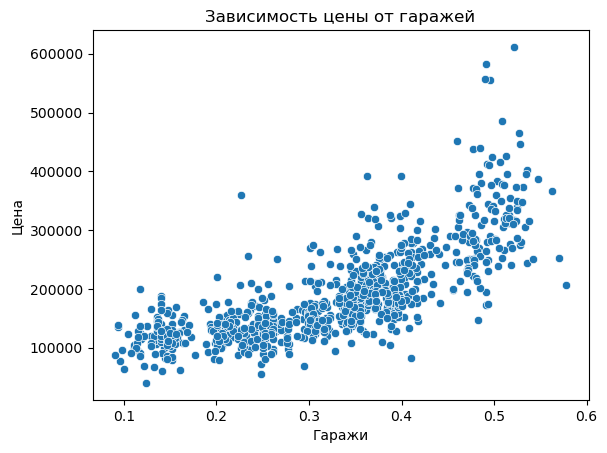

In [66]:
# Используем нашу функцию для чистки выбросов

numerical_columns = ['garage']

df_iqr_filtered = remove_outliers_IQR(df, numerical_columns)

# Строим график

sns.scatterplot(data=df_iqr_filtered, x=df_iqr_filtered['garage'], y=df_iqr_filtered['SalePrice'])
plt.title("Зависимость цены от гаражей")
plt.xlabel("Гаражи")
plt.ylabel("Цена")
plt.show()

In [67]:
print(f"Размер данных до очистки: {len(df)}")
print(f"Размер данных после очистки: {len(df_iqr_filtered)}")

Размер данных до очистки: 985
Размер данных после очистки: 933


*Распределние не вплоне очевидно. ПОпробуем построить их от корня данных и из логарифма (для нормализации распеределения)*

/tmp/ipykernel_9482/1302669679.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr_filtered.loc[:, 'garage_sqrt'] = df_iqr_filtered.loc[:, 'garage']**0.5
/tmp/ipykernel_9482/1302669679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr_filtered.loc[:, 'garage_log'] = np.log1p(df_iqr_filtered.loc[:, 'garage'])


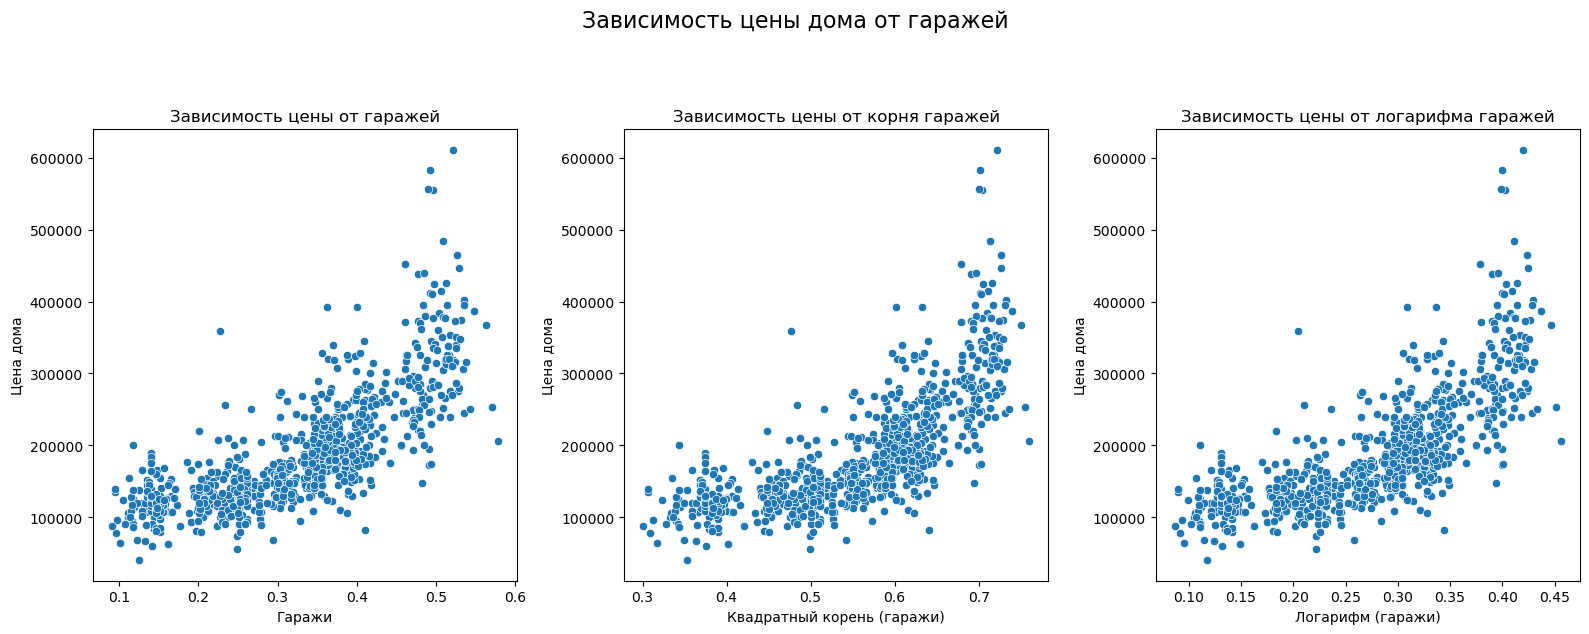

In [68]:
# Построение графиков

# Создаем 3 графика рядом
fig, axes = plt.subplots(1, 3, figsize=(16, 6))  

# Добавляем общий заголовок для всего ряда графиков
fig.suptitle(f'Зависимость цены дома от гаражей', fontsize=16, y=1.05)

df_iqr_filtered.loc[:, 'garage_sqrt'] = df_iqr_filtered.loc[:, 'garage']**0.5
df_iqr_filtered.loc[:, 'garage_log'] = np.log1p(df_iqr_filtered.loc[:, 'garage'])


# График базовый
sns.scatterplot(ax=axes[0], x=df_iqr_filtered['garage'], y=df_iqr_filtered['SalePrice'])
axes[0].set_title("Зависимость цены от гаражей")
axes[0].set_xlabel("Гаражи")
axes[0].set_ylabel('Цена дома')

# График от корня

sns.scatterplot(ax=axes[1], x=df_iqr_filtered['garage_sqrt'], y=df_iqr_filtered['SalePrice'])
axes[1].set_title("Зависимость цены от корня гаражей")
axes[1].set_xlabel("Квадратный корень (гаражи)")
axes[1].set_ylabel('Цена дома')

# График от логарифма

sns.scatterplot(ax=axes[2], x=df_iqr_filtered['garage_log'], y=df_iqr_filtered['SalePrice'])
axes[2].set_title("Зависимость цены от логарифма гаражей")
axes[2].set_xlabel("Логарифм (гаражи)")
axes[2].set_ylabel('Цена дома')

# Упорядочиваем и показываем графики
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Отступ для общего заголовка
plt.show()


### Вывод: После чистки кол-во данных почти не изменлось. Построение графика от корня и логарифма подводит нас к тому, что график скорее параболический т.е гаражи начинают оказывать влияние не сразу а после определнного объема. Но после этого они довольно сильно влияют на цену.

## *5. Удобства внутри дома: KitchenQual, HeatingQC, CentralAir, Functional.*

In [69]:
# проверим типы данных

df[['KitchenQual', 'HeatingQC', 'CentralAir', 'Functional']].dtypes

KitchenQual    object
HeatingQC      object
CentralAir     object
Functional     object
dtype: object

In [70]:
# Исходя из полученных данных цифровых данных нет. Для всех полей определим веса с помощью корреляции


# Переводим данные в бинарные и затем проверяем корреляцию с SalePrice
KitchenQual_correlations = pd.get_dummies(df['KitchenQual'], prefix='KitchenQual').corrwith(df['SalePrice'])
HeatingQC_correlations = pd.get_dummies(df['HeatingQC'], prefix='HeatingQC').corrwith(df['SalePrice'])
CentralAir_correlations = pd.get_dummies(df['CentralAir'], prefix='CentralAir').corrwith(df['SalePrice'])
Functional_correlations = pd.get_dummies(df['Functional'], prefix='Functional').corrwith(df['SalePrice'])


# Нормализуем веса
KitchenQual_mapping = {col.split('_')[1]: corr for col, corr in KitchenQual_correlations.items() if 'KitchenQual' in col}
HeatingQC_mapping = {col.split('_')[1]: corr for col, corr in HeatingQC_correlations.items() if 'HeatingQC' in col}
CentralAir_mapping = {col.split('_')[1]: corr for col, corr in CentralAir_correlations.items() if 'CentralAir' in col}
Functional_mapping = {col.split('_')[1]: corr for col, corr in Functional_correlations.items() if 'Functional' in col}

# Преобразуем к положительным значениям
KitchenQual_mapping_corr = {k: v if v > 0 else 0 for k, v in KitchenQual_mapping.items()}
HeatingQC_mapping_corr = {k: v if v > 0 else 0 for k, v in HeatingQC_mapping.items()}
CentralAir_mapping_corr = {k: v if v > 0 else 0 for k, v in CentralAir_mapping.items()}
Functional_mapping_corr = {k: v if v > 0 else 0 for k, v in Functional_mapping.items()}


print("KitchenQual Mapping (корреляция):", KitchenQual_mapping_corr)
print("HeatingQC Mapping(корреляция) :", HeatingQC_mapping_corr)
print("CentralAir Mapping(корреляция) :", CentralAir_mapping_corr)
print("Functional Mapping(корреляция) :", Functional_mapping_corr)

KitchenQual Mapping (корреляция): {'Ex': 0.5345612544539633, 'Fa': 0, 'Gd': 0.34796547252503884, 'TA': 0}
HeatingQC Mapping(корреляция) : {'Ex': 0.4944656199762747, 'Fa': 0, 'Gd': 0, 'Po': 0, 'TA': 0}
CentralAir Mapping(корреляция) : {'N': 0, 'Y': 0.2678312323535125}
Functional Mapping(корреляция) : {'Maj1': 0, 'Maj2': 0, 'Min1': 0, 'Min2': 0, 'Mod': 0, 'Typ': 0.14213259880297857}


*корреляции положительные и есть ненулевые поля, поэтому используем все данные*

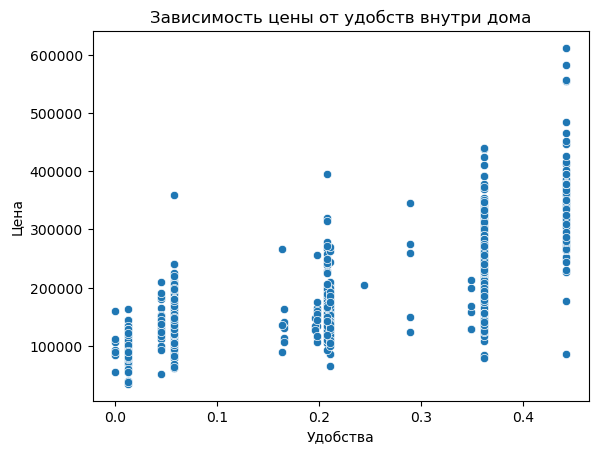

In [71]:
# Добавляем те категорийные данные что планируем использовать
df['KitchenQual_Score'] = df['KitchenQual'].map(KitchenQual_mapping_corr)
df['HeatingQC_Score'] = df['HeatingQC'].map(HeatingQC_mapping_corr)
df['CentralAir_Score'] = df['CentralAir'].map(CentralAir_mapping_corr)
df['Functional_Score'] = df['Functional'].map(Functional_mapping_corr)


# Чтобы определить веса для сводных данных снова воспользуемся корреляцией

# Рассчитываем корреляцию каждого признака с ценой
correlations = df[['KitchenQual_Score', 'HeatingQC_Score', 'CentralAir_Score', 'Functional_Score', 'SalePrice']].corr()

# Извлекаем корреляцию для нужных признаков
KitchenQual_corr = correlations.loc['KitchenQual_Score', 'SalePrice']
HeatingQC_corr = correlations.loc['HeatingQC_Score', 'SalePrice']
CentralAir_corr = correlations.loc['CentralAir_Score', 'SalePrice']
Functional_corr = correlations.loc['Functional_Score', 'SalePrice']


# Нормализуем корреляции для использования в качестве весов
total_corr = KitchenQual_corr + HeatingQC_corr + CentralAir_corr + Functional_corr 
KitchenQual_weight = KitchenQual_corr / total_corr
HeatingQC_weight = HeatingQC_corr / total_corr
CentralAir_weight = CentralAir_corr / total_corr
Functional_weight = Functional_corr / total_corr

# Применяем веса для расчета Outdoor_Score
df['Amenities'] = (
    KitchenQual_weight * df['KitchenQual_Score'] +
    HeatingQC_weight * df['HeatingQC_Score'] +
    CentralAir_weight * df['CentralAir_Score'] +
    Functional_weight * df['Functional_Score'] 
 )


# Строим график

sns.scatterplot(data=df, x='Amenities', y='SalePrice')
plt.title("Зависимость цены от удобств внутри дома")
plt.xlabel("Удобства")
plt.ylabel("Цена")
plt.show()





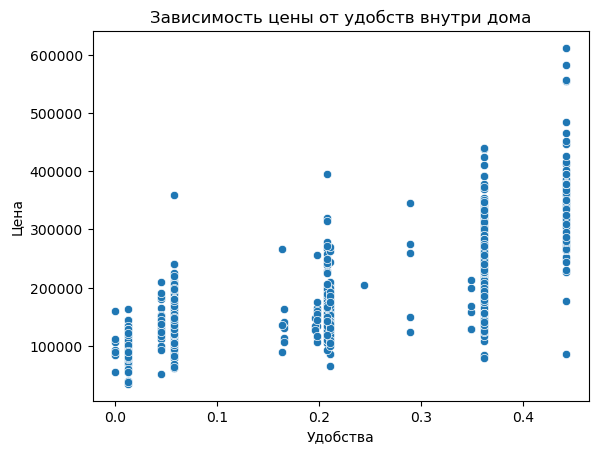

In [72]:
# Используем нашу функцию для чистки выбросов

numerical_columns = ['Amenities']

df_iqr_filtered = remove_outliers_IQR(df, numerical_columns)

# Строим график

sns.scatterplot(data=df_iqr_filtered, x=df_iqr_filtered['Amenities'], y=df_iqr_filtered['SalePrice'])
plt.title("Зависимость цены от удобств внутри дома")
plt.xlabel("Удобства")
plt.ylabel("Цена")
plt.show()

In [73]:
print(f"Размер данных до очистки: {len(df)}")
print(f"Размер данных после очистки: {len(df_iqr_filtered)}")

Размер данных до очистки: 985
Размер данных после очистки: 985


*График имеет линейное распределение. Но для уточнения построим другой тип графика (ящик с усами)*

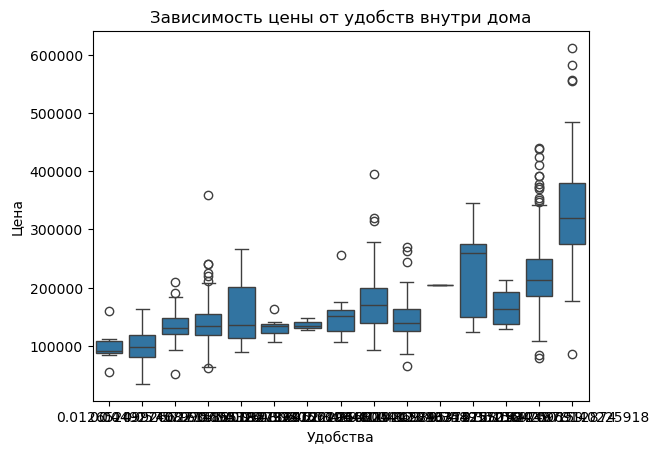

In [74]:
sns.boxplot(data=df, x='Amenities', y='SalePrice')
plt.title("Зависимость цены от удобств внутри дома")
plt.xlabel("Удобства")
plt.ylabel("Цена")
plt.show()

### Вывод: После чистки кол-во данных не изменлось. График линенйный и его вид показывает, что удобства- дискретные данные (т.е изменяются в опредленном диапазоне (например от 1 до 10)
например 
- x=0.1: Уровень удобства минимальный (базовый уровень).    
- x=0.2: Уровень удобства немного выше.
- x=0.35: Более высокий комфорт.
- x=0.5: Максимальное удобство.
Каждый уровень независимо влияет на цену дома, но слабовыраженно и в определнном диазоне.И в большей степени только максимальный уровень удобства.

# Анализ цен по сегментам


*Проведем анализ цен по сегментам*
1. По качеству жилья (OverallQual, ExterQual, KitchenQual).
2. По расположению (Neighborhood, Condition1, Condition2)

## Анализ цен по качеству жилья

In [75]:
# проверим типы данных

df[['OverallQual', 'ExterQual', 'KitchenQual']].dtypes

OverallQual     int64
ExterQual      object
KitchenQual    object
dtype: object

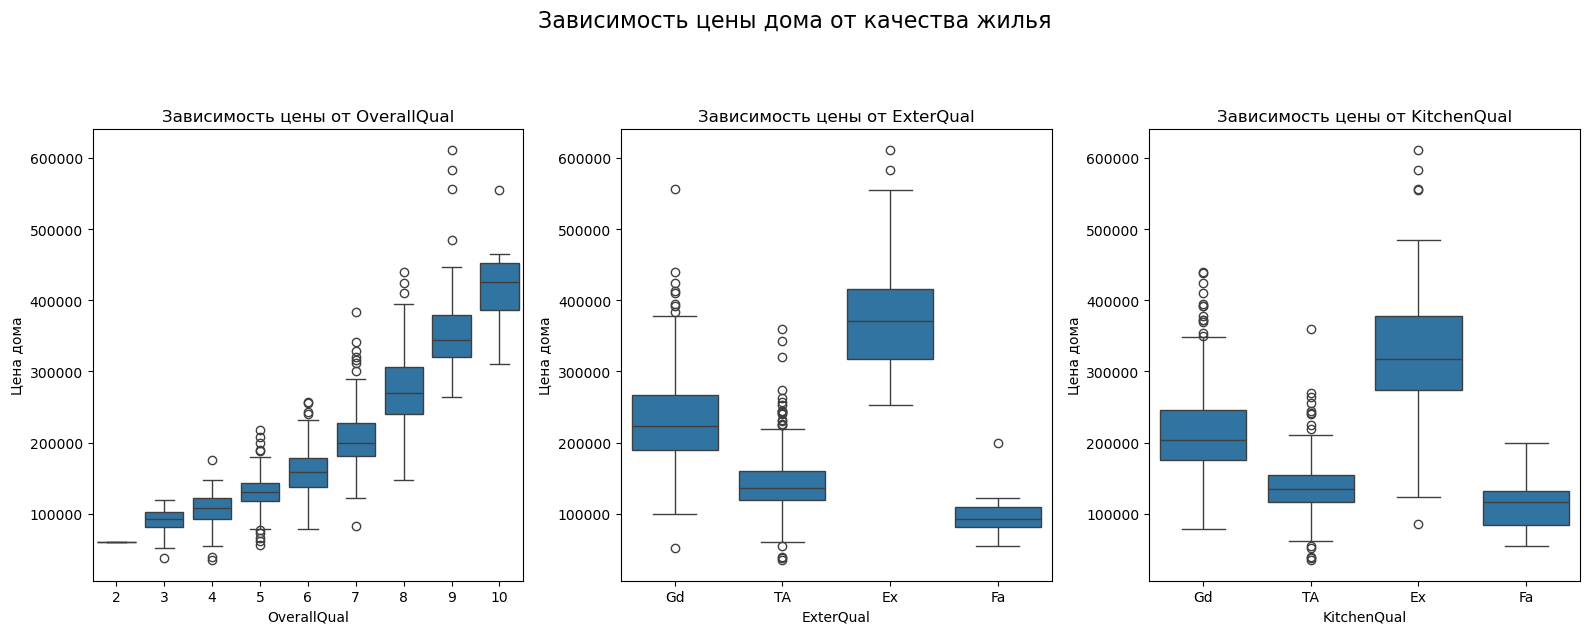

In [76]:
# вначале построим графики по кажому фактору по отдельности и проанализируем факторы по отдельности
# Создаем 3 графика рядом
fig, axes = plt.subplots(1, 3, figsize=(16, 6))  

# Добавляем общий заголовок для всего ряда графиков
fig.suptitle(f'Зависимость цены дома от качества жилья', fontsize=16, y=1.05)

sns.boxplot(ax=axes[0], x=df['OverallQual'], y=df_iqr_filtered['SalePrice'])
axes[0].set_title("Зависимость цены от OverallQual")
axes[0].set_xlabel("OverallQual")
axes[0].set_ylabel('Цена дома')


sns.boxplot(ax=axes[1], x=df['ExterQual'], y=df_iqr_filtered['SalePrice'])
axes[1].set_title("Зависимость цены от ExterQual")
axes[1].set_xlabel("ExterQual")
axes[1].set_ylabel('Цена дома')

sns.boxplot(ax=axes[2], x=df['KitchenQual'], y=df_iqr_filtered['SalePrice'])
axes[2].set_title("Зависимость цены от KitchenQual")
axes[2].set_xlabel("KitchenQual")
axes[2].set_ylabel('Цена дома')


# Упорядочиваем и показываем графики
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Отступ для общего заголовка
plt.show()


In [77]:
# почистим данные от выбросов
# для OverallQual применим remove_outliers_IQR

numerical_columns = ['OverallQual']


df_iqr_filtered = remove_outliers_IQR(df, numerical_columns)

car_columns = ['ExterQual', 'KitchenQual']

# для ExterQual и KitchenQual применим handle_rare_categories

dr_handle = handle_rare_categories(df,car_columns, 10)


Количествo уникальных значений для ExterQual:
ExterQual
TA    589
Gd    350
Ex     37
Fa      9
Name: count, dtype: int64
Редкие категории для ExterQual: Index(['Fa'], dtype='object', name='ExterQual')
Количествo уникальных значений для KitchenQual:
KitchenQual
TA    487
Gd    398
Ex     73
Fa     27
Name: count, dtype: int64
Редкие категории для KitchenQual: Index([], dtype='object', name='KitchenQual')


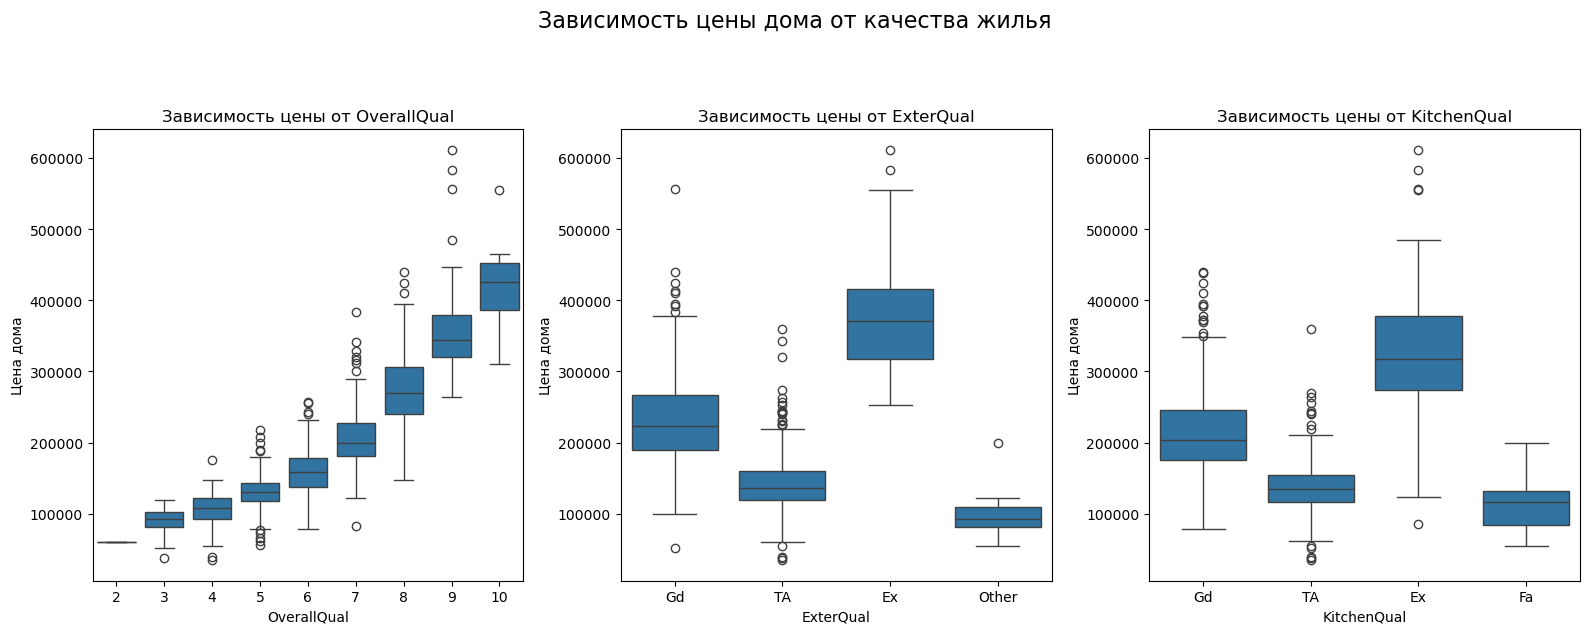

In [78]:
# Создаем 3 графика рядом
fig, axes = plt.subplots(1, 3, figsize=(16, 6))  

# Добавляем общий заголовок для всего ряда графиков
fig.suptitle(f'Зависимость цены дома от качества жилья', fontsize=16, y=1.05)

sns.boxplot(ax=axes[0], x=df_iqr_filtered['OverallQual'], y=df_iqr_filtered['SalePrice'])
axes[0].set_title("Зависимость цены от OverallQual")
axes[0].set_xlabel("OverallQual")
axes[0].set_ylabel('Цена дома')


sns.boxplot(ax=axes[1], x=dr_handle['ExterQual'], y=dr_handle['SalePrice'])
axes[1].set_title("Зависимость цены от ExterQual")
axes[1].set_xlabel("ExterQual")
axes[1].set_ylabel('Цена дома')

sns.boxplot(ax=axes[2], x=dr_handle['KitchenQual'], y=dr_handle['SalePrice'])
axes[2].set_title("Зависимость цены от KitchenQual")
axes[2].set_xlabel("KitchenQual")
axes[2].set_ylabel('Цена дома')


# Упорядочиваем и показываем графики
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Отступ для общего заголовка
plt.show()

### Вывод: После чистки кол-во данных почти не изменилось. 
- OverallQual. График зависимости - параболический. Т.е слабый прирост вначале с постепенно рарастающей интенсивностью.
- ExterQual и KitchenQual. Оба графика похожи. И их линейность вызвана тем что эти данные дискретные (т.е ограничены диапазоном. т.е например  качество от 0 до 1)

*Создаем сводную таблицу по всем параметрам качества жилья и проанализируем это*

In [79]:
# Исходя из  данных OverallQual - цифровые данные. Для остальных столбцов определим веса с помощью корреляции


# Переводим данные в бинарные и затем проверяем корреляцию с SalePrice
ExterQual_correlations = pd.get_dummies(df['ExterQual'], prefix='ExterQual').corrwith(df['SalePrice'])
KitchenQual_correlations = pd.get_dummies(df['KitchenQual'], prefix='KitchenQual').corrwith(df['SalePrice'])

# Нормализуем веса
ExterQual_mapping = {col.split('_')[1]: corr for col, corr in ExterQual_correlations.items() if 'ExterQual' in col}
KitchenQual_mapping = {col.split('_')[1]: corr for col, corr in KitchenQual_correlations.items() if 'KitchenQual' in col}

# Преобразуем к положительным значениям
ExterQual_mapping_corr = {k: v if v > 0 else 0 for k, v in ExterQual_mapping.items()}
KitchenQual_mapping_corr = {k: v if v > 0 else 0 for k, v in KitchenQual_mapping.items()}

print("ExterQual Mapping (корреляция):", ExterQual_mapping_corr)
print("KitchenQual Mapping(корреляция) :", KitchenQual_mapping_corr)


ExterQual Mapping (корреляция): {'Ex': 0.5036603600312051, 'Gd': 0.4861457055074405, 'Other': 0, 'TA': 0}
KitchenQual Mapping(корреляция) : {'Ex': 0.5345612544539633, 'Fa': 0, 'Gd': 0.34796547252503884, 'TA': 0}


*Значения корреляции не нулевые и двольно весомые, поэтому используем все данные*

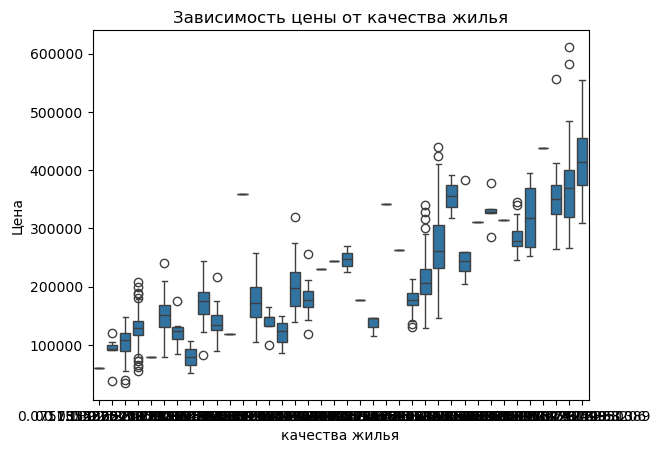

In [80]:
# Добавляем те категорийные данные что планируем использовать
df['ExterQual_Score'] = df['ExterQual'].map(ExterQual_mapping_corr)
df['KitchenQual_Score'] = df['KitchenQual'].map(KitchenQual_mapping_corr)


# Нормализуем числовые данные
df['OverallQual_Norm'] = df['OverallQual'].fillna(0) / df['OverallQual'].max()

# Чтобы определить веса для сводных данных снова воспользуемся корреляцией

# Рассчитываем корреляцию каждого признака с ценой
correlations = df[['ExterQual_Score', 'KitchenQual_Score', 'OverallQual_Norm', 'SalePrice']].corr()

# Извлекаем корреляцию для нужных признаков
ExterQual_corr = correlations.loc['ExterQual_Score', 'SalePrice']
KitchenQual_corr = correlations.loc['KitchenQual_Score', 'SalePrice']
OverallQual_corr = correlations.loc['OverallQual_Norm', 'SalePrice']


# Нормализуем корреляции для использования в качестве весов
total_corr = ExterQual_corr + KitchenQual_corr + OverallQual_corr
ExterQual_weight = ExterQual_corr / total_corr
KitchenQual_weight = KitchenQual_corr / total_corr
OverallQual_weight = OverallQual_corr / total_corr


# Применяем веса для расчета Outdoor_Score
df['housing_quality'] = (
    ExterQual_weight * df['ExterQual_Score'] +
    KitchenQual_weight * df['KitchenQual_Score'] +
    OverallQual_weight * df['OverallQual_Norm'] 
 )


# Строим график

sns.boxplot(data=df, x='housing_quality', y='SalePrice')
plt.title("Зависимость цены от качества жилья")
plt.xlabel("качества жилья")
plt.ylabel("Цена")
plt.show()



### Вывод: Сводный график стал почти линеным. Т.к большую роль сиграли дискретные показатели. Т.е с ростом качества постепенно нарастает и диапазон цен, но до определенного уровня рост малозначителен. 

## Анализ цен по расположению (Neighborhood, Condition1, Condition2)

In [81]:
# т.к все данные категорийные пробуем срез по средней цене

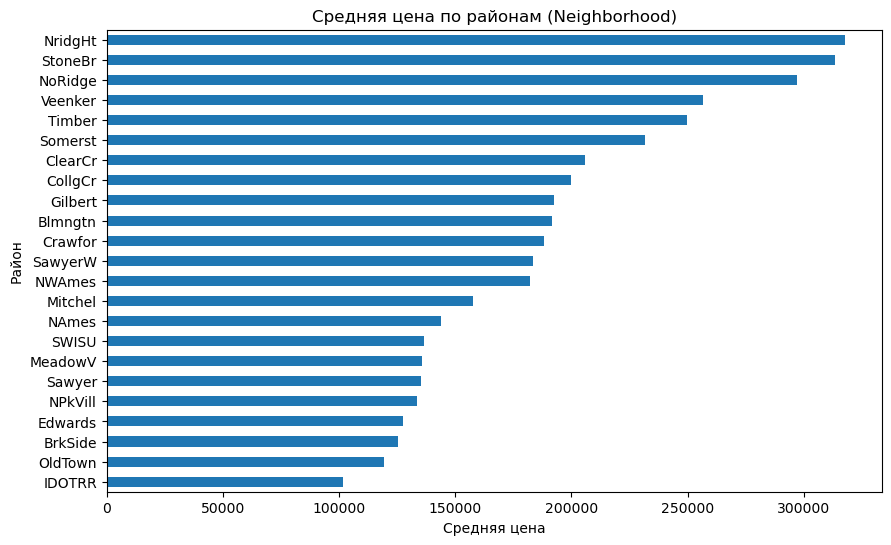

In [82]:
neighborhood_price = df.groupby('Neighborhood')['SalePrice'].mean()
neighborhood_price

neighborhood_price.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Средняя цена по районам (Neighborhood)")
plt.xlabel("Средняя цена")
plt.ylabel("Район")
plt.show()

### Вывод: Исходя из графика видим как район влияет на цену, Самый непрестижный район с минимальной ценой "IDOTRR", а самый дорогой район "NridHt"

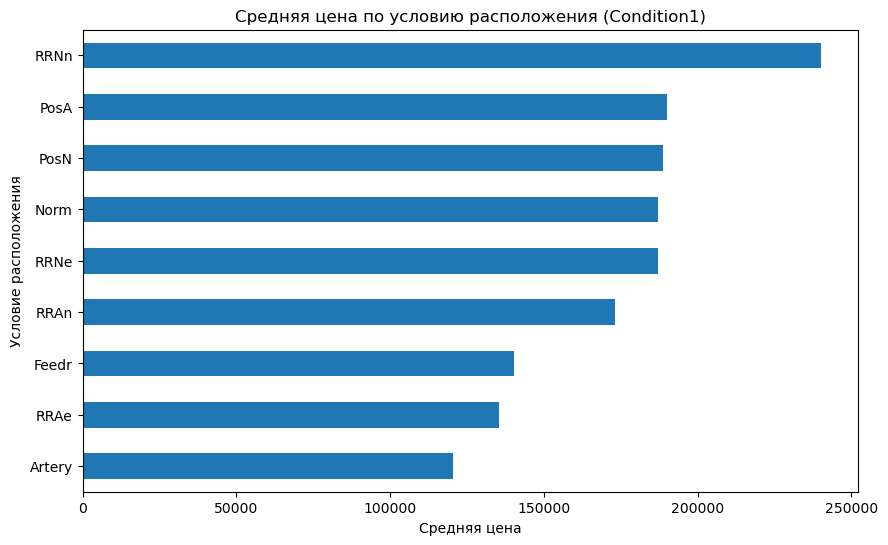

In [83]:
condition1_price = df.groupby('Condition1')['SalePrice'].mean()
condition1_price

condition1_price.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Средняя цена по условию расположения (Condition1)")
plt.xlabel("Средняя цена")
plt.ylabel("Условие расположения")
plt.show()

### Вывод: Исходя из графика видим как условия (Condition1) влияют на цену, Самый дешевое условие с минимальной ценой "Artery", а самый дорогое условие "RRNn"

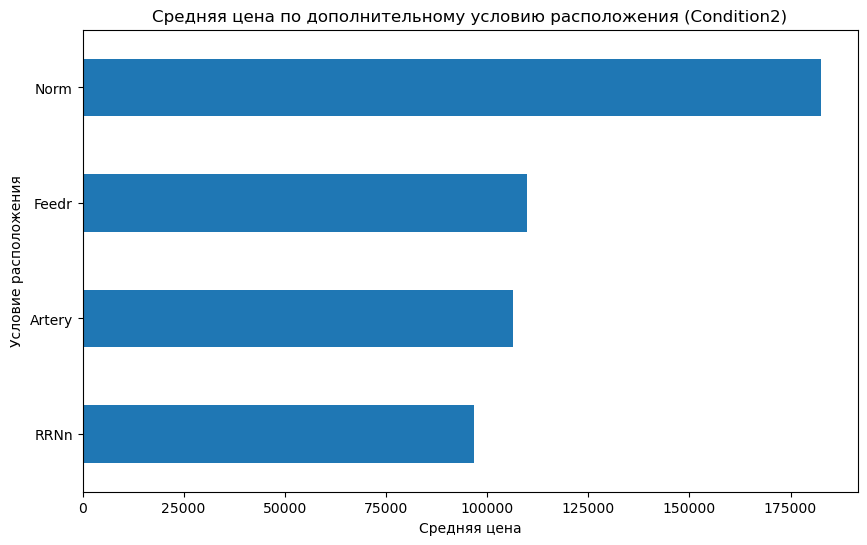

In [84]:
condition2_price = df.groupby('Condition2')['SalePrice'].mean()
condition2_price

condition2_price.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Средняя цена по дополнительному условию расположения (Condition2)")
plt.xlabel("Средняя цена")
plt.ylabel("Условие расположения")
plt.show()

### Вывод: Исходя из графика видим как условия (Condition2) влияют на цену, Самый дешевое условие с минимальной ценой "RRNn", а самый дорогое условие "Norm"

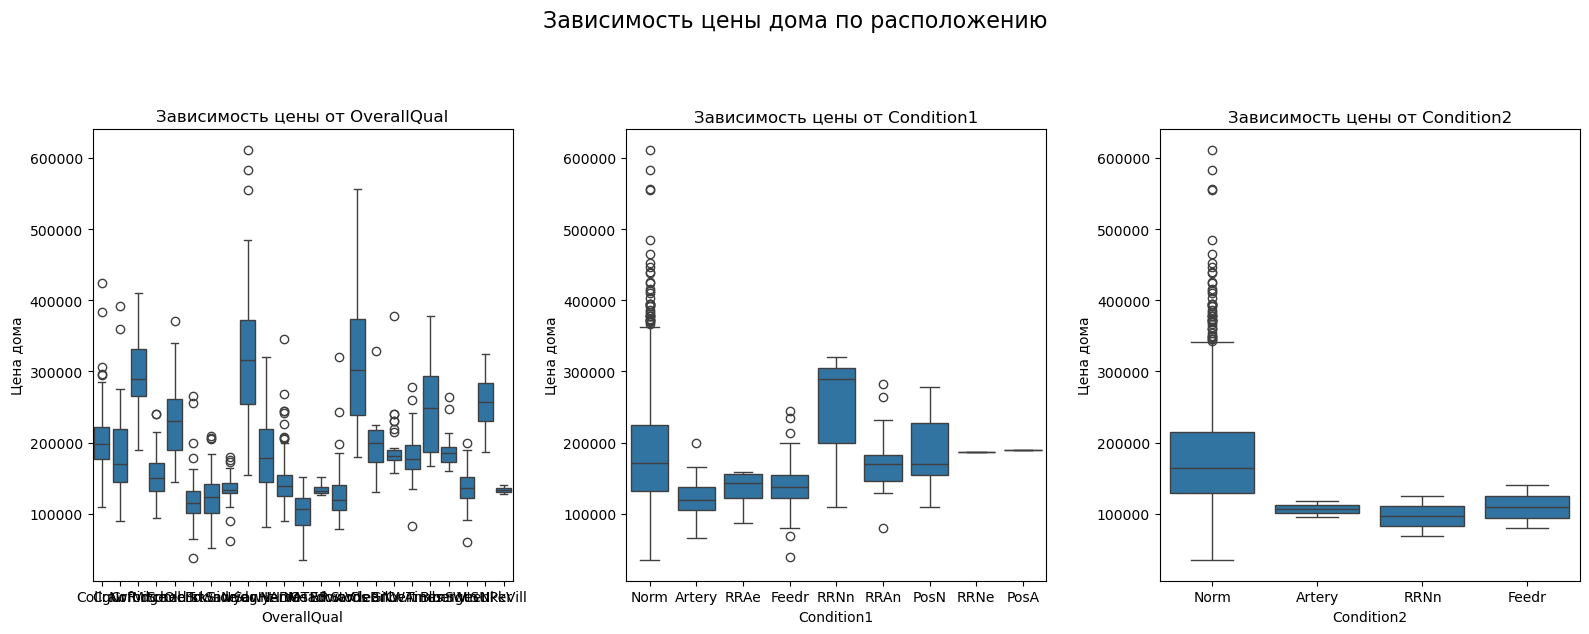

In [85]:
# построим графики boxplot по всем трем условиям

# Создаем 3 графика рядом
fig, axes = plt.subplots(1, 3, figsize=(16, 6))  

# Добавляем общий заголовок для всего ряда графиков
fig.suptitle(f'Зависимость цены дома по расположению', fontsize=16, y=1.05)

sns.boxplot(ax=axes[0], x=df['Neighborhood'], y=df_iqr_filtered['SalePrice'])
axes[0].set_title("Зависимость цены от OverallQual")
axes[0].set_xlabel("OverallQual")
axes[0].set_ylabel('Цена дома')


sns.boxplot(ax=axes[1], x=df['Condition1'], y=df_iqr_filtered['SalePrice'])
axes[1].set_title("Зависимость цены от Condition1")
axes[1].set_xlabel("Condition1")
axes[1].set_ylabel('Цена дома')

sns.boxplot(ax=axes[2], x=df['Condition2'], y=df_iqr_filtered['SalePrice'])
axes[2].set_title("Зависимость цены от Condition2")
axes[2].set_xlabel("Condition2")
axes[2].set_ylabel('Цена дома')


# Упорядочиваем и показываем графики
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Отступ для общего заголовка
plt.show()

### Вывод: Исходя из графика:
- OverallQual - дискретные значения. мы имеем набор качественных оценок дома которые не свзаны друг с другом. Некоторые параметры оценки сильнее влияют на цену, например 'NridHt' и 'Stonebr'. В приципе соответствует средней цене по районам.
- Condition1 и Condition2 - на цену влияния почтине имеет. Параметр Norm может бытькак у дешевого дома так и дорого. А остльные параметры в среднем одинаковы по цене.

# Анализ  трендов по времени (YearBuilt, YrSold, MoSold)

## По году постройки дома

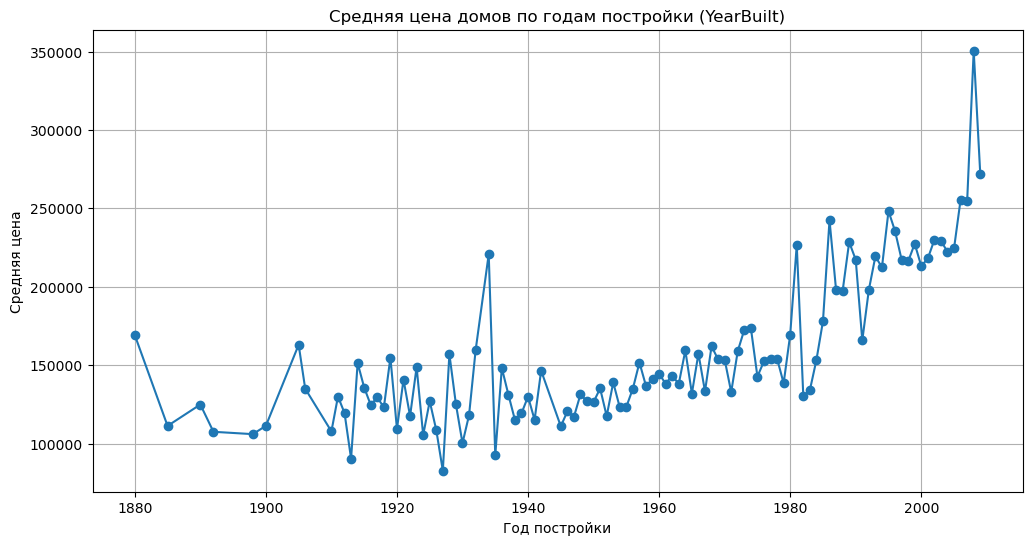

In [86]:
yearbuilt_price = df.groupby('YearBuilt')['SalePrice'].mean()
yearbuilt_price

plt.figure(figsize=(12, 6))
yearbuilt_price.plot(kind='line', marker='o')
plt.title("Средняя цена домов по годам постройки (YearBuilt)")
plt.xlabel("Год постройки")
plt.ylabel("Средняя цена")
plt.grid()
plt.show()


### Вывод: Исходя из графика цена на дома с датами постройки с 1880 по 1980 варьировалась в пределах 50000 (между 100000 и 150000), за исключением 1937-38(там рост более выраженный). С 1980 по 2000 - колебания в переделах 100000 в диапазоне от 150000 до 200000. С 2000 рост до 2010 до 350000. с 2010 - падение цен на дома.

## По году продажи дома

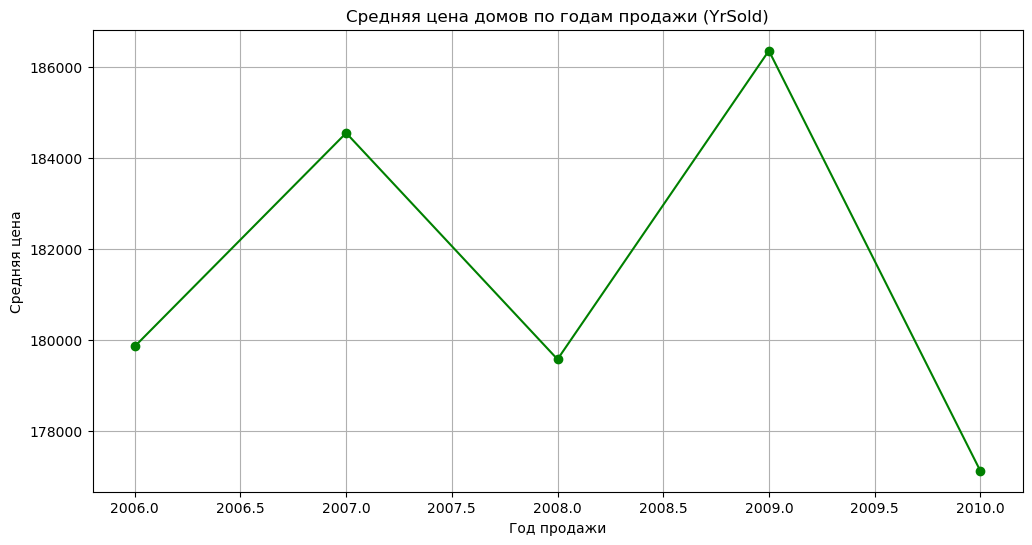

In [87]:
yrsold_price = df.groupby('YrSold')['SalePrice'].mean()
yrsold_price

plt.figure(figsize=(12, 6))
yrsold_price.plot(kind='line', marker='o', color='green')
plt.title("Средняя цена домов по годам продажи (YrSold)")
plt.xlabel("Год продажи")
plt.ylabel("Средняя цена")
plt.grid()
plt.show()


### Вывод: Исходя из графика с 2006 по 2007 и 2008 по 2009 стоимость продажи домов росла, с 2007 по 2008 и с 2009 по 2010 - падение стоимости продаж. Сравнивая с графиком зависимости цен от даты построки дома и максимально цены продаж приходим к выводу, что в основном  релизуются дома до 1980 года постройки.

## По месяцам продажи

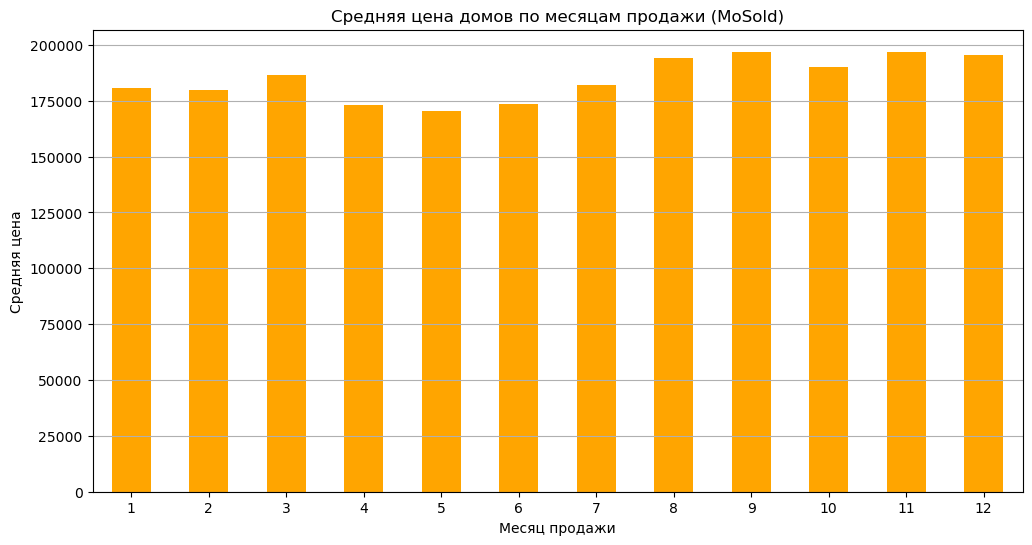

In [88]:
mosold_price = df.groupby('MoSold')['SalePrice'].mean()
mosold_price

plt.figure(figsize=(12, 6))
mosold_price.plot(kind='bar', color='orange')
plt.title("Средняя цена домов по месяцам продажи (MoSold)")
plt.xlabel("Месяц продажи")
plt.ylabel("Средняя цена")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### Вывод: Месячные колебания не значительные. Т.е наблюдается небольшой спад ближе к маю  и рост с сентября (т.е спад в летний сезон), что скорее всего вызванно летними отпусками некотрой части потенциальных продавцов/покупателей